In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Dataset reading and dataset overview

In [173]:
import pandas as pd
data = pd.read_csv('data/sample_walmart_retail_dataset.csv')
data.head()

order_id  order_date order_priority  \
0  ddb2de3d-ded3-4715-97cf-69becc54d95a  16-03-2022            Low   
1  c4d92cf0-fee8-41e8-904d-b132eb429e24  26-09-2019       Critical   
2  cc09b9ad-a17d-42bf-835e-d35cc66e30f9  10-09-2022           High   
3  7c955c6b-ca70-4b97-a9f8-a38af866b506  10-02-2022       Critical   
4  8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a  02-11-2020  Not Specified   

    ship_date       ship_mode customer_id  customer_age customer_segment  \
0  18-03-2022     Express Air    a2b28c3f            59        Corporate   
1  01-10-2019  Delivery Truck    0375660f            73         Consumer   
2  15-09-2022  Delivery Truck    fb823f3d            43      Home Office   
3  11-02-2022     Regular Air    17771651            30         Consumer   
4  04-11-2020     Regular Air    8e721b69            44   Small Business   

         country            city  ...   region  product_id product_category  \
0  United States   Bullhead City  ...     West    eeb8cd3f  Office Supplies   
1  United States    Grand Island  ...  Central    f235a01b       Technology   
2  United States      Georgetown  ...  Central    44f572ea       Technology   
3  United States       Dix Hills  ...     East    e56df987        Furniture   
4  United States  Harker Heights  ...  Central    20018a8c        Furniture   

   product_sub_category                                       product_name  \
0            Appliances  Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...   
1       Copiers and Fax                      Canon PC1080F Personal Copier   
2  Computer Peripherals              Gyration Ultra Cordless Optical Suite   
3                Tables                  Hon Rectangular Conference Tables   
4                Tables           Balt Split Level Computer Training Table   

      sales unit_price  order_quantity  discount       profit  
0    839.07     279.81               3      0.12   8584.44253  
1  25791.40     599.99              43      0.19  14583.60689  
2   1108.47     100.97              11      0.20  12245.47225  
3   1365.18     227.55               6      0.02  -8526.40009  
4   3189.41     138.75              23      0.08   9616.03084  

[5 rows x 22 columns]

In [174]:
data.shape

(25000, 22)

In [175]:
# Convert 'order_date' column to datetime type
data['order_date'] = pd.to_datetime(data['order_date'])


C:\Users\triam_6it\AppData\Local\Temp\ipykernel_4508\3613027082.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [176]:
#convert 'ship_date' column to datatime type
data['ship_date'] = pd.to_datetime(data['ship_date'])

C:\Users\triam_6it\AppData\Local\Temp\ipykernel_4508\915211982.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              25000 non-null  object        
 1   order_date            25000 non-null  datetime64[ns]
 2   order_priority        25000 non-null  object        
 3   ship_date             25000 non-null  datetime64[ns]
 4   ship_mode             25000 non-null  object        
 5   customer_id           25000 non-null  object        
 6   customer_age          25000 non-null  int64         
 7   customer_segment      25000 non-null  object        
 8   country               25000 non-null  object        
 9   city                  25000 non-null  object        
 10  state                 25000 non-null  object        
 11  zip_code              25000 non-null  int64         
 12  region                25000 non-null  object        
 13  product_id      

In [178]:
data.isnull().sum()

order_id                0
order_date              0
order_priority          0
ship_date               0
ship_mode               0
customer_id             0
customer_age            0
customer_segment        0
country                 0
city                    0
state                   0
zip_code                0
region                  0
product_id              0
product_category        0
product_sub_category    0
product_name            0
sales                   0
unit_price              0
order_quantity          0
discount                0
profit                  0
dtype: int64

In [179]:
data.duplicated().sum()

0

In [180]:
data.nunique()

order_id                25000
order_date               1470
order_priority              5
ship_date                1477
ship_mode                   3
customer_id               784
customer_age               71
customer_segment            4
country                     1
city                     1154
state                      40
zip_code                 1147
region                      4
product_id               1183
product_category            3
product_sub_category       16
product_name             1183
sales                   20329
unit_price                719
order_quantity             50
discount                   26
profit                  24934
dtype: int64

# summary statistics

In [181]:
#summary statistics for numerical variables
data.describe().T

count                        mean                  min  \
order_date        25000  2021-01-04 23:58:12.864000  2019-01-01 00:00:00   
ship_date         25000  2021-01-10 11:36:05.760000  2019-01-03 00:00:00   
customer_age    25000.0                    55.03084                 20.0   
zip_code        25000.0                  60390.0596              10528.0   
sales           25000.0                 2350.985374                 1.34   
unit_price      25000.0                   93.491543                 0.99   
order_quantity  25000.0                    25.51664                  1.0   
discount        25000.0                    0.124728                  0.0   
profit          25000.0                 6534.490505         -14139.73795   

                                25%                  50%                  75%  \
order_date      2020-01-02 18:00:00  2021-01-04 00:00:00  2022-01-06 00:00:00   
ship_date       2020-01-08 00:00:00  2021-01-10 00:00:00  2022-01-12 00:00:00   
customer_age                   37.0                 55.0                 73.0   
zip_code                    43026.0              60148.0              78641.0   
sales                        135.99               444.62            1784.3875   
unit_price                     6.48                21.78                80.98   
order_quantity                 14.0                 25.0                 38.0   
discount                       0.06                 0.12                 0.19   
profit                 -3884.329935          6492.884945         16922.009975   

                                max           std  
order_date      2023-01-09 00:00:00           NaN  
ship_date       2023-01-18 00:00:00           NaN  
customer_age                   90.0     20.247533  
zip_code                    99362.0   23585.65073  
sales                     312012.94   8506.681891  
unit_price                  6783.02    316.679417  
order_quantity                 50.0     14.056834  
discount                       0.25      0.071978  
profit                    27219.848  11981.938327

In [182]:
# summary statistics for categorical  variables
data.describe( include='object').T

count unique                                      top  \
order_id              25000  25000     ddb2de3d-ded3-4715-97cf-69becc54d95a   
order_priority        25000      5                            Not Specified   
ship_mode             25000      3                              Express Air   
customer_id           25000    784                                 58952382   
customer_segment      25000      4                                 Consumer   
country               25000      1                            United States   
city                  25000   1154                            The Woodlands   
state                 25000     40                                    Texas   
region                25000      4                                  Central   
product_id            25000   1183                                 23c6857b   
product_category      25000      3                          Office Supplies   
product_sub_category  25000     16                                    Paper   
product_name          25000   1183  Global Adaptabilities Conference Tables   

                       freq  
order_id                  1  
order_priority         5096  
ship_mode              8367  
customer_id              50  
customer_segment       6310  
country               25000  
city                     43  
state                  2806  
region                11502  
product_id               61  
product_category      13539  
product_sub_category   3817  
product_name             61

#outliers treatment

In [183]:
data.head()

order_id order_date order_priority  ship_date  \
0  ddb2de3d-ded3-4715-97cf-69becc54d95a 2022-03-16            Low 2022-03-18   
1  c4d92cf0-fee8-41e8-904d-b132eb429e24 2019-09-26       Critical 2019-10-01   
2  cc09b9ad-a17d-42bf-835e-d35cc66e30f9 2022-09-10           High 2022-09-15   
3  7c955c6b-ca70-4b97-a9f8-a38af866b506 2022-02-10       Critical 2022-02-11   
4  8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a 2020-11-02  Not Specified 2020-11-04   

        ship_mode customer_id  customer_age customer_segment        country  \
0     Express Air    a2b28c3f            59        Corporate  United States   
1  Delivery Truck    0375660f            73         Consumer  United States   
2  Delivery Truck    fb823f3d            43      Home Office  United States   
3     Regular Air    17771651            30         Consumer  United States   
4     Regular Air    8e721b69            44   Small Business  United States   

             city  ...   region  product_id product_category  \
0   Bullhead City  ...     West    eeb8cd3f  Office Supplies   
1    Grand Island  ...  Central    f235a01b       Technology   
2      Georgetown  ...  Central    44f572ea       Technology   
3       Dix Hills  ...     East    e56df987        Furniture   
4  Harker Heights  ...  Central    20018a8c        Furniture   

   product_sub_category                                       product_name  \
0            Appliances  Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...   
1       Copiers and Fax                      Canon PC1080F Personal Copier   
2  Computer Peripherals              Gyration Ultra Cordless Optical Suite   
3                Tables                  Hon Rectangular Conference Tables   
4                Tables           Balt Split Level Computer Training Table   

      sales unit_price  order_quantity  discount       profit  
0    839.07     279.81               3      0.12   8584.44253  
1  25791.40     599.99              43      0.19  14583.60689  
2   1108.47     100.97              11      0.20  12245.47225  
3   1365.18     227.55               6      0.02  -8526.40009  
4   3189.41     138.75              23      0.08   9616.03084  

[5 rows x 22 columns]

In [184]:
data.columns

Index(['order_id', 'order_date', 'order_priority', 'ship_date', 'ship_mode',
       'customer_id', 'customer_age', 'customer_segment', 'country', 'city',
       'state', 'zip_code', 'region', 'product_id', 'product_category',
       'product_sub_category', 'product_name', 'sales', 'unit_price',
       'order_quantity', 'discount', 'profit'],
      dtype='object')

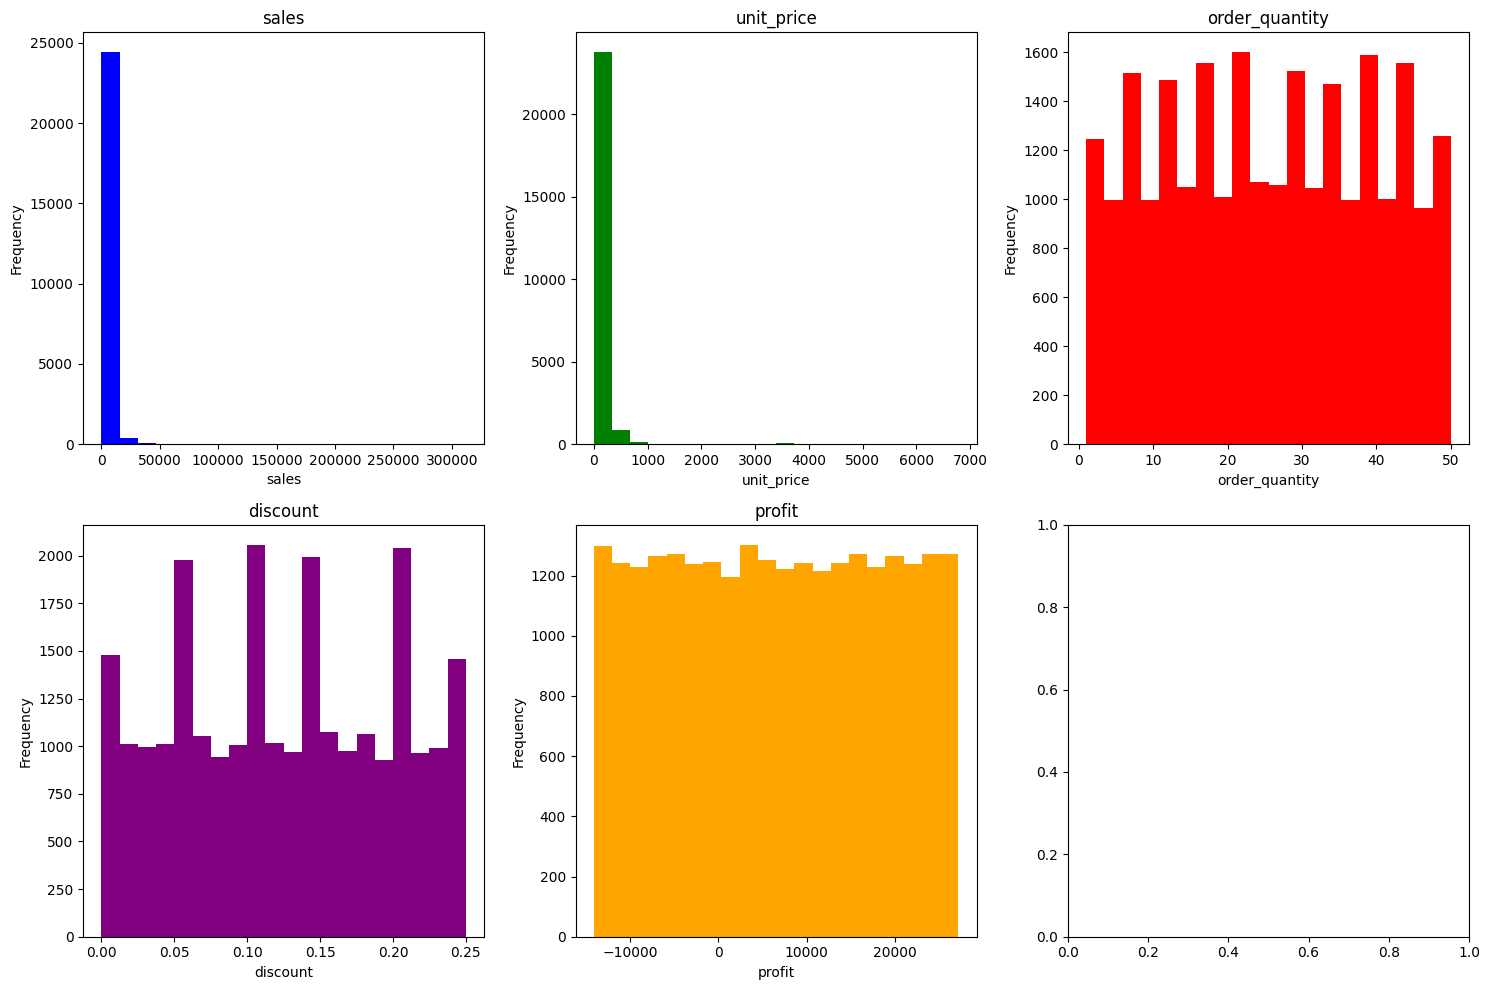

In [185]:
# Select only numerical columns for plotting histograms
numerical_cols = ['sales', 'unit_price', 'order_quantity', 'discount', 'profit']
numerical_data = data[numerical_cols]

# Plot histograms for each numerical column in one row with 3 plots per row
fig, axs = plt.subplots(len(numerical_cols) // 3 + (len(numerical_cols) % 3 > 0), 3, figsize=(15, 5 * (len(numerical_cols) // 3 + (len(numerical_cols) % 3 > 0))))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, col in enumerate(numerical_cols):
    ax = axs[i // 3, i % 3]
    ax.hist(numerical_data[col], bins=20, color=colors[i])
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

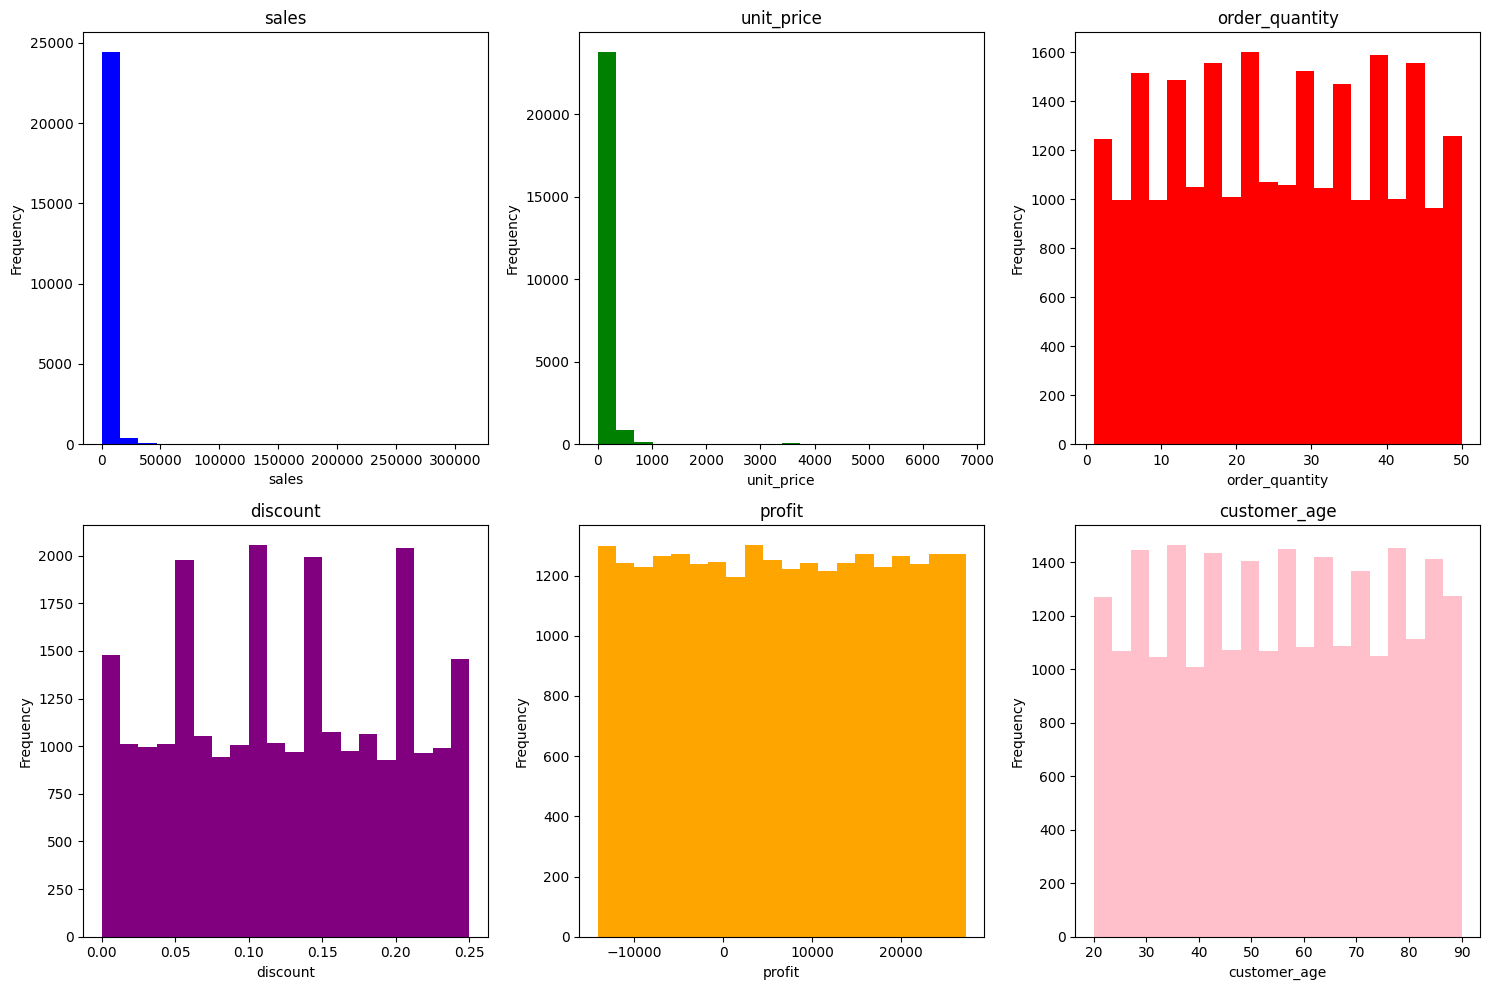

In [186]:
# Select only numerical columns for plotting histograms
numerical_cols = ['sales', 'unit_price', 'order_quantity', 'discount', 'profit', 'customer_age']
numerical_data = data[numerical_cols]

# Plot histograms for each numerical column in one row with 3 plots per row
fig, axs = plt.subplots(len(numerical_cols) // 3 + (len(numerical_cols) % 3 > 0), 3, figsize=(15, 5 * (len(numerical_cols) // 3 + (len(numerical_cols) % 3 > 0))))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

for i, col in enumerate(numerical_cols):
    ax = axs[i // 3, i % 3]
    ax.hist(numerical_data[col], bins=20, color=colors[i])
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

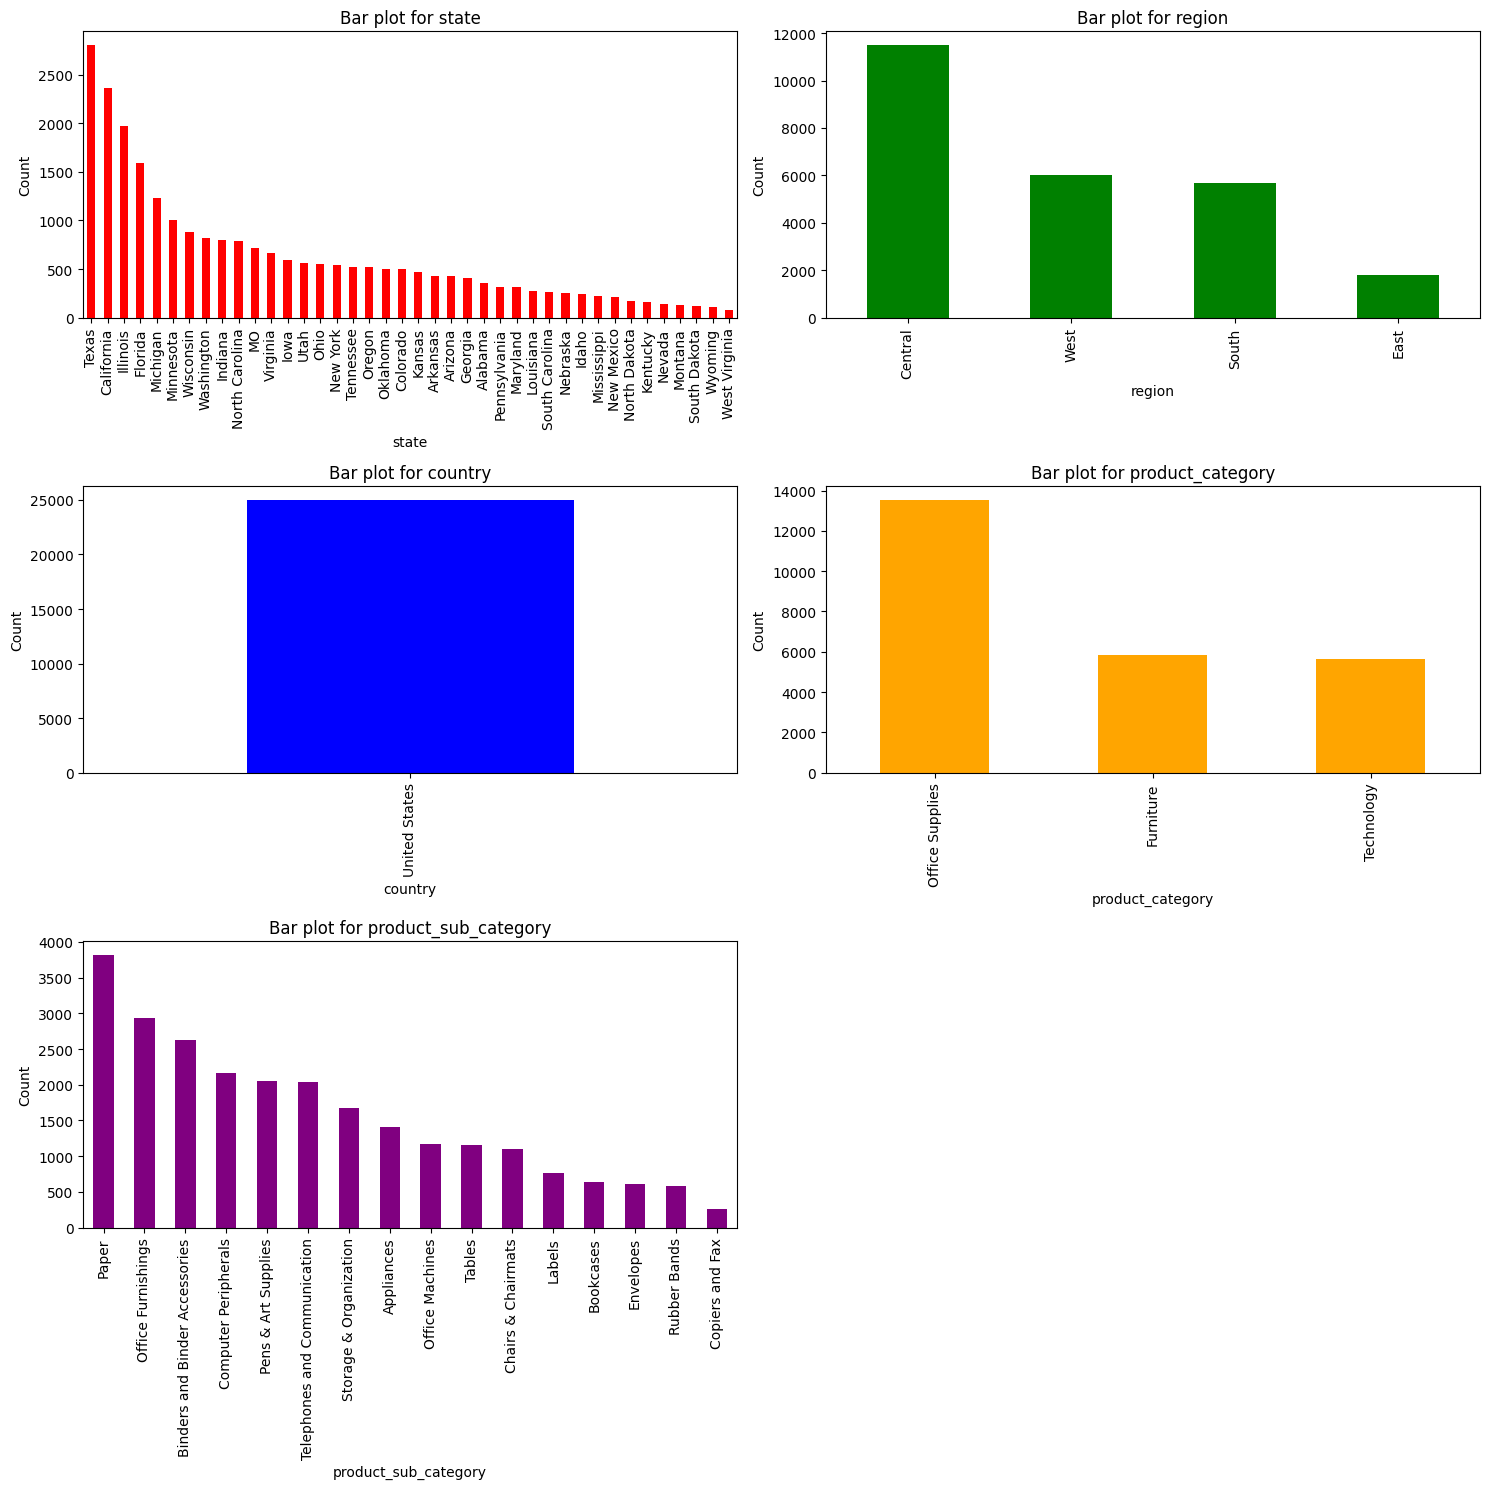

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'data' with the variable name of your actual DataFrame
categorical_columns = ['state', 'region', 'country', 'product_category', 'product_sub_category']

# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Calculate the number of rows needed for 2 columns
num_rows = (len(categorical_columns) + 1) // 2

# Create a figure and a set of subplots with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical column and create a bar plot with a different color
for i, col in enumerate(categorical_columns):
    data[col].value_counts().plot(kind='bar', color=colors[i % len(colors)], ax=axes[i])
    axes[i].set_title(f'Bar plot for {col}')
    axes[i].set_ylabel('Count')

# If there are any leftover subplots, turn them off
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


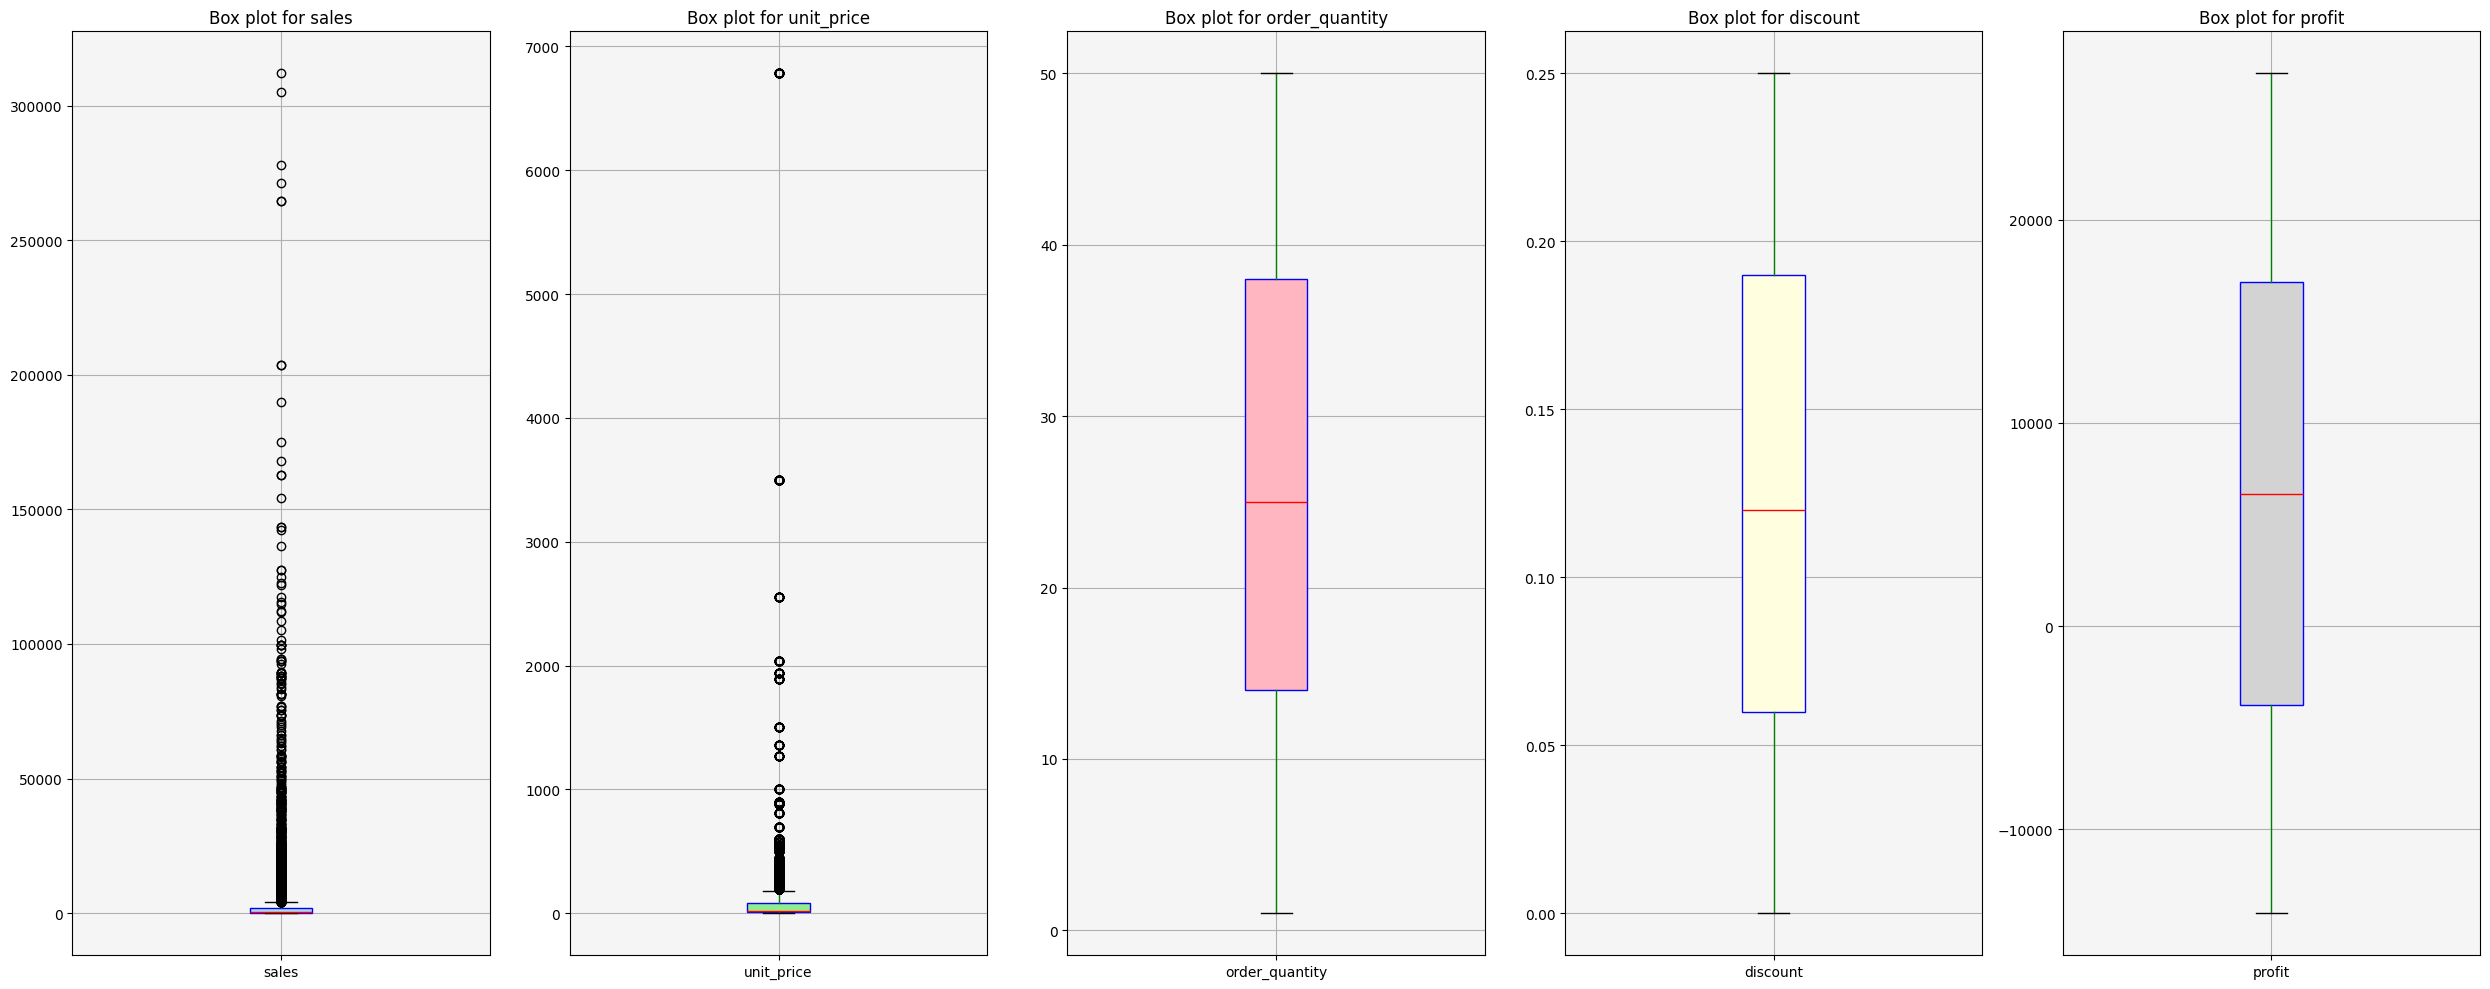

In [188]:

numerical_columns = ['sales', 'unit_price', 'order_quantity', 'discount', 'profit']

# Define colors for the box plots
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightgrey']

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(5*len(numerical_columns), 10))

# Loop through each numerical column and create a colorful box plot
for i, col in enumerate(numerical_columns):
    bplot = data.boxplot(column=col, ax=axes[i], patch_artist=True,
                         boxprops=dict(facecolor=colors[i], color='blue'),
                         medianprops=dict(color='red'),
                         whiskerprops=dict(color='green'))
    axes[i].set_title(f'Box plot for {col}')
    axes[i].set_facecolor('whitesmoke')  # Change background color

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\triam_6it\AppData\Local\Temp\ipykernel_4508\1700691969.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\triam_6it\AppData\Local\Temp\ipykernel_4508\1700691969.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\triam_6it\AppData\Local\Temp\ipykernel_4508\1700691969.py:23:

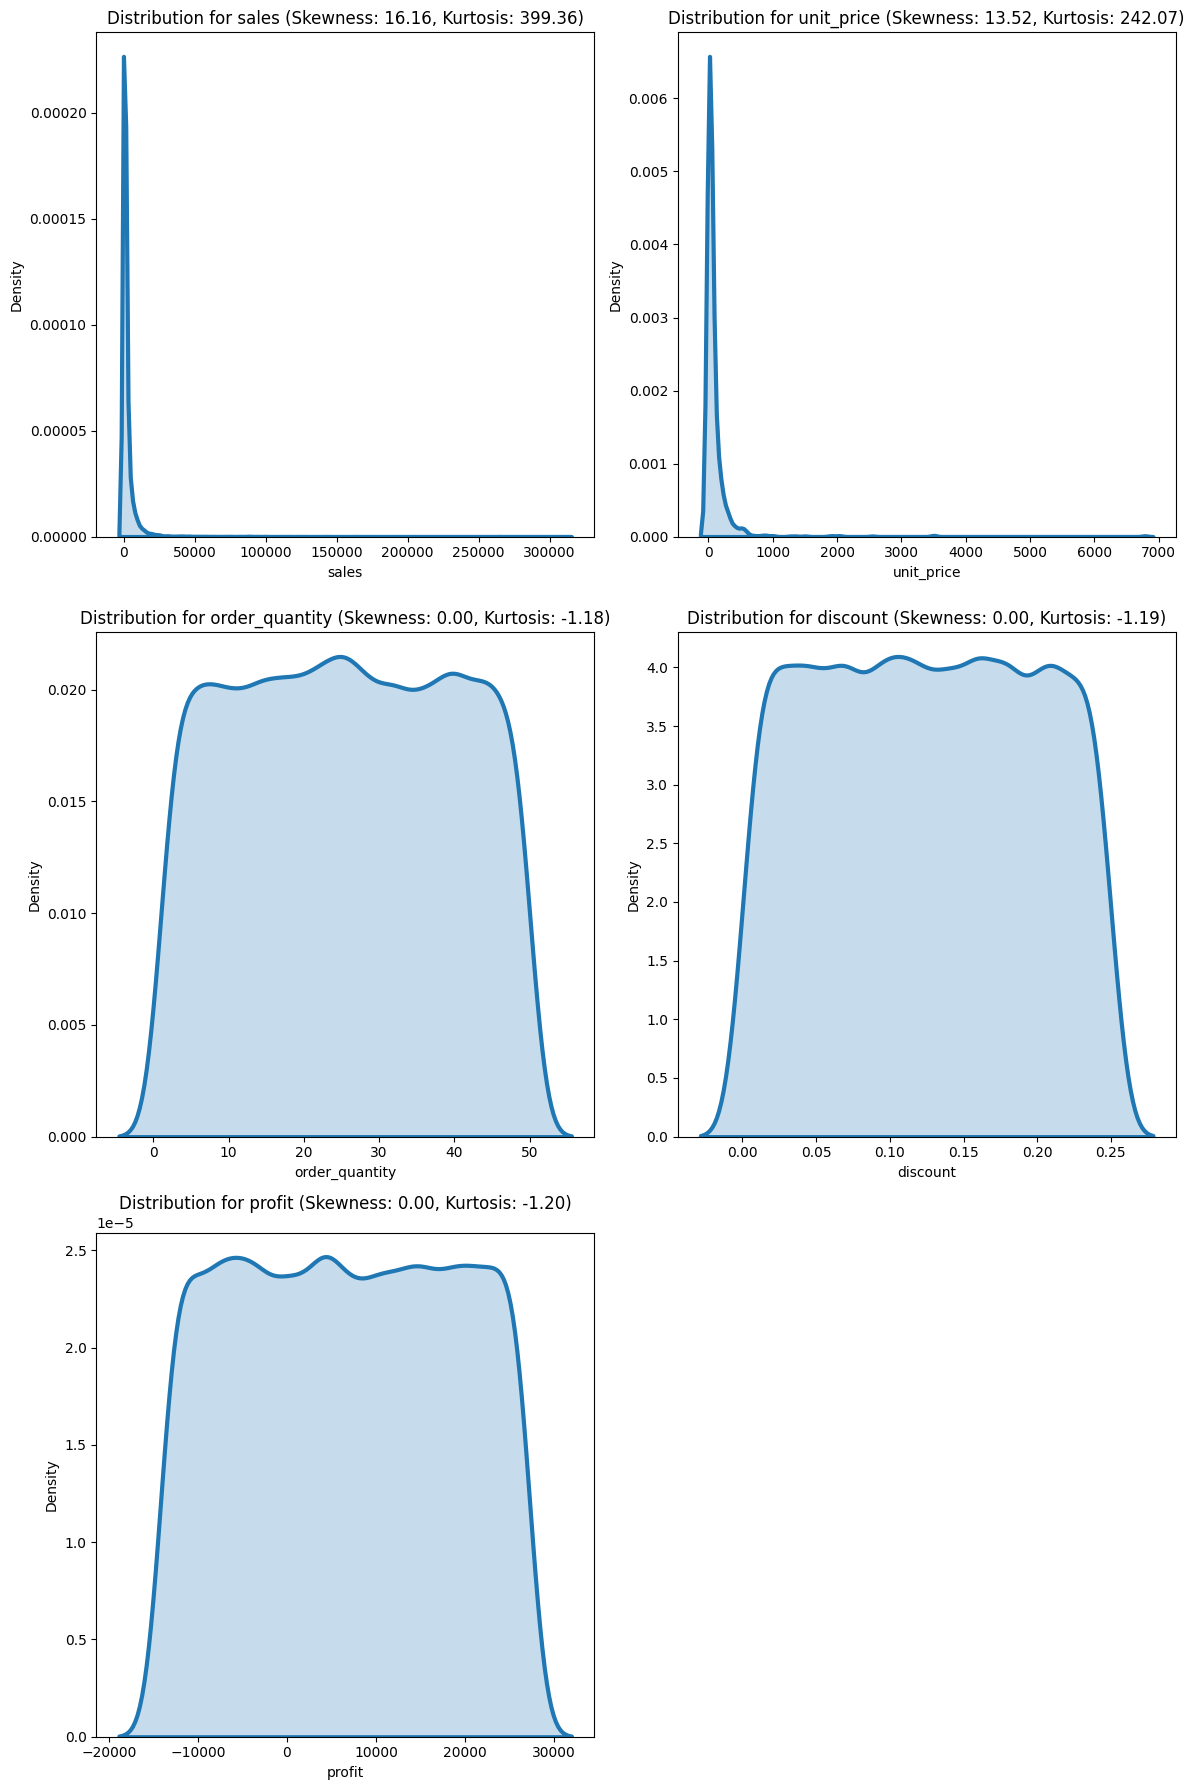

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your sample data is already provided in the 'data' DataFrame

# List of numerical columns to check skewness and kurtosis
numerical_columns = ['sales', 'unit_price', 'order_quantity', 'discount', 'profit']

# Determine the number of rows needed for 2 plots per row
num_rows = -(-len(numerical_columns) // 2)  # Ceiling division

# Create a figure for the plots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))  # Adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate skewness and kurtosis, and plot the distribution curve for each numerical column
for i, col in enumerate(numerical_columns):
    skewness = data[col].skew()
    kurtosis = data[col].kurtosis()
    sns.distplot(data[col], ax=axes[i], hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 3})
    axes[i].set_title(f'Distribution for {col} (Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f})')
    axes[i].set_ylabel('Density')

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust the layout with increased space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust the width and height spacing

# Show the plot
plt.show()


In [190]:
negative_values_count = (data['unit_price'] < 0).sum()
negative_values_count

0

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              25000 non-null  object        
 1   order_date            25000 non-null  datetime64[ns]
 2   order_priority        25000 non-null  object        
 3   ship_date             25000 non-null  datetime64[ns]
 4   ship_mode             25000 non-null  object        
 5   customer_id           25000 non-null  object        
 6   customer_age          25000 non-null  int64         
 7   customer_segment      25000 non-null  object        
 8   country               25000 non-null  object        
 9   city                  25000 non-null  object        
 10  state                 25000 non-null  object        
 11  zip_code              25000 non-null  int64         
 12  region                25000 non-null  object        
 13  product_id      

In [192]:


# Calculate the lower and upper bounds for capping
Q1 = data[['sales', 'unit_price']].quantile(0.25)
Q3 = data[['sales', 'unit_price']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping to outliers in the 'sales' and 'unit_price' columns
df = data.copy()
df['sales'] = np.where(df['sales'] < lower_bound['sales'], lower_bound['sales'], df['sales'])
df['sales'] = np.where(df['sales'] > upper_bound['sales'], upper_bound['sales'], df['sales'])
df['unit_price'] = np.where(df['unit_price'] < lower_bound['unit_price'], lower_bound['unit_price'], df['unit_price'])
df['unit_price'] = np.where(df['unit_price'] > upper_bound['unit_price'], upper_bound['unit_price'], df['unit_price'])


In [193]:
df.columns

Index(['order_id', 'order_date', 'order_priority', 'ship_date', 'ship_mode',
       'customer_id', 'customer_age', 'customer_segment', 'country', 'city',
       'state', 'zip_code', 'region', 'product_id', 'product_category',
       'product_sub_category', 'product_name', 'sales', 'unit_price',
       'order_quantity', 'discount', 'profit'],
      dtype='object')

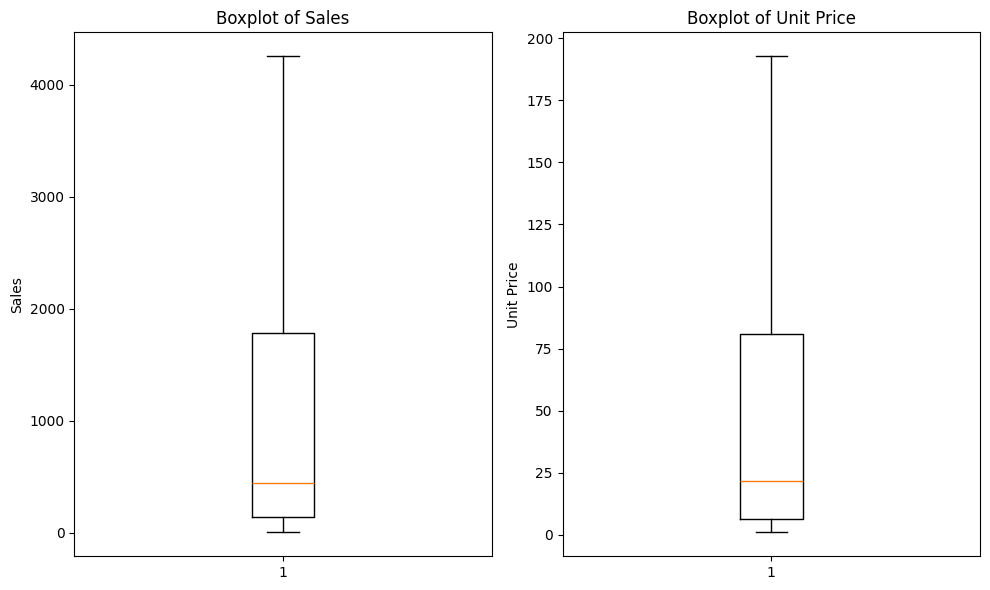

In [194]:


# Plotting boxplots for 'sales' and 'unit_price' columns
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
plt.boxplot(df['unit_price'])
plt.title('Boxplot of Unit Price')
plt.ylabel('Unit Price')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [195]:
df.nunique()

order_id                25000
order_date               1470
order_priority              5
ship_date                1477
ship_mode                   3
customer_id               784
customer_age               71
customer_segment            4
country                     1
city                     1154
state                      40
zip_code                 1147
region                      4
product_id               1183
product_category            3
product_sub_category       16
product_name             1183
sales                   17228
unit_price                612
order_quantity             50
discount                   26
profit                  24934
dtype: int64

In [196]:
customer_id_counts = df['customer_id'].value_counts().reset_index()
customer_id_counts

customer_id  count
0      58952382     50
1      6c70cbca     48
2      cdaa712c     48
3      17771651     47
4      89410aaf     47
..          ...    ...
779    2b2e28b5     18
780    c38ced44     18
781    e0ac2700     18
782    4addef0a     17
783    243aa4a6     16

[784 rows x 2 columns]

# RFM ANALYSIS

In [197]:
# calcualter the recent purchase for each customer
recency_df = df.groupby('customer_id')['order_date'].max().reset_index().rename(columns = {'order_date': 'last_purchase_date'})

In [198]:
recency_df.head()

customer_id last_purchase_date
0    00039fbd         2022-12-21
1    00a7fb72         2022-10-24
2    00f9b723         2022-12-28
3    014d7b69         2022-12-24
4    0163ecd8         2022-12-05

In [199]:
# lastest date in the dataset
latest_date = df['order_date'].max()
latest_date

Timestamp('2023-01-09 00:00:00')

In [200]:
#calcuate the recenecy of each customer's last purchase
recency_df['recency'] = recency_df['last_purchase_date'].apply(lambda x : (latest_date - x).days)
recency_df

customer_id last_purchase_date  recency
0      00039fbd         2022-12-21       19
1      00a7fb72         2022-10-24       77
2      00f9b723         2022-12-28       12
3      014d7b69         2022-12-24       16
4      0163ecd8         2022-12-05       35
..          ...                ...      ...
779    ff013cb5         2023-01-01        8
780    ffb25c83         2022-12-17       23
781    ffbcd780         2022-12-05       35
782    ffc72b60         2022-12-28       12
783    ffc9084f         2022-11-24       46

[784 rows x 3 columns]

In [201]:
#droping the last purchase culomn because we need only recency for better understanding
recency_df.drop('last_purchase_date', axis =1, inplace = True)
recency_df

customer_id  recency
0      00039fbd       19
1      00a7fb72       77
2      00f9b723       12
3      014d7b69       16
4      0163ecd8       35
..          ...      ...
779    ff013cb5        8
780    ffb25c83       23
781    ffbcd780       35
782    ffc72b60       12
783    ffc9084f       46

[784 rows x 2 columns]

# Frequency

In [202]:
#counting the number of orders for each customer
frequency_df = df.groupby('customer_id')['order_id'].count().reset_index().rename(columns = {'order_id': 'frequency'})
frequency_df

customer_id  frequency
0      00039fbd         33
1      00a7fb72         36
2      00f9b723         27
3      014d7b69         34
4      0163ecd8         36
..          ...        ...
779    ff013cb5         33
780    ffb25c83         26
781    ffbcd780         26
782    ffc72b60         43
783    ffc9084f         33

[784 rows x 2 columns]

# Monetary Value

In [203]:
# calculate the total amount spend by each customer
monetary_df = df.groupby('customer_id')['sales'].sum().reset_index().rename(columns = {'sales' : 'monetary_value'})
monetary_df.head()

customer_id  monetary_value
0    00039fbd     37761.94750
1    00a7fb72     37309.43750
2    00f9b723     27260.40375
3    014d7b69     24052.14375
4    0163ecd8     42242.59500

In [204]:
# merging all recency frequency, monetary values with customer columns
rfm = recency_df.merge(frequency_df, on = 'customer_id').merge(monetary_df, on = 'customer_id')
rfm.head()

customer_id  recency  frequency  monetary_value
0    00039fbd       19         33     37761.94750
1    00a7fb72       77         36     37309.43750
2    00f9b723       12         27     27260.40375
3    014d7b69       16         34     24052.14375
4    0163ecd8       35         36     42242.59500

# Customer segments with RFM Model

In [205]:
# calculate the quantiles for the RFM dataframe
quantiles_df  = rfm[['recency','frequency','monetary_value']].quantile(q = [0.25, 0.5, 0.75])
quantiles_df

recency  frequency  monetary_value
0.25    13.75       28.0    30647.227813
0.50    33.00       32.0    37651.298125
0.75    65.00       36.0    45953.380937

In [206]:
temp_df = quantiles_df.transpose()
temp_df

0.25          0.50          0.75
recency            13.750000     33.000000     65.000000
frequency          28.000000     32.000000     36.000000
monetary_value  30647.227813  37651.298125  45953.380937

In [207]:
# Convert quantile value to dictionary
quantiles_dict_df = quantiles_df.transpose().to_dict()
quantiles_dict_df

{0.25: {'recency': 13.75, 'frequency': 28.0, 'monetary_value': 30647.2278125},
 0.5: {'recency': 33.0, 'frequency': 32.0, 'monetary_value': 37651.298125},
 0.75: {'recency': 65.0, 'frequency': 36.0, 'monetary_value': 45953.3809375}}

In [208]:
# creating recency score column by dividing recency into quartiles and assigning respective quantile lables
rfm['recency_score'] = pd.qcut(rfm['recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4,0,-1)))

# creating frequency score column by dividing frequency into quartiles and assigning respective quanitle labels
rfm['frequency_score'] = pd.qcut(rfm['frequency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(1,5)))

# creating monetary score column by diving monetary value into quartiles and assigning respectvie quanitles lables
rfm['monetary_score'] = pd.qcut(rfm['monetary_value'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(1,5)))

# show first 5 rows of the rfm dataframe

rfm.head()

customer_id  recency  frequency  monetary_value recency_score  \
0    00039fbd       19         33     37761.94750             3   
1    00a7fb72       77         36     37309.43750             1   
2    00f9b723       12         27     27260.40375             4   
3    014d7b69       16         34     24052.14375             3   
4    0163ecd8       35         36     42242.59500             2   

  frequency_score monetary_score  
0               3              3  
1               3              2  
2               1              1  
3               3              1  
4               3              3

In [209]:
# concatenate the recency score, frequency score, and monetary score columns into one rfm score column

rfm['rfm_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)
rfm.head()

customer_id  recency  frequency  monetary_value recency_score  \
0    00039fbd       19         33     37761.94750             3   
1    00a7fb72       77         36     37309.43750             1   
2    00f9b723       12         27     27260.40375             4   
3    014d7b69       16         34     24052.14375             3   
4    0163ecd8       35         36     42242.59500             2   

  frequency_score monetary_score rfm_score  
0               3              3       333  
1               3              2       132  
2               1              1       411  
3               3              1       331  
4               3              3       233

In [210]:
# sorting the dataframe by monetary value in descending order and rest the index
rfm2 = rfm[rfm['rfm_score'] == '444'].sort_values('monetary_value', ascending = False)

rfm2.head()

customer_id  recency  frequency  monetary_value recency_score  \
256    58952382        5         50     75077.76125             4   
622    d0ea0bde        2         40     68436.88125             4   
496    a9066b38        1         44     65903.38375             4   
401    8a5b7fb6       10         38     61198.71625             4   
170    3a77d672       11         39     60190.43625             4   

    frequency_score monetary_score rfm_score  
256               4              4       444  
622               4              4       444  
496               4              4       444  
401               4              4       444  
170               4              4       444

In [211]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   customer_id      784 non-null    object  
 1   recency          784 non-null    int64   
 2   frequency        784 non-null    int64   
 3   monetary_value   784 non-null    float64 
 4   recency_score    784 non-null    category
 5   frequency_score  784 non-null    category
 6   monetary_score   784 non-null    category
 7   rfm_score        784 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 33.6+ KB


In [212]:
print("Best Customers: ", len(rfm[rfm['rfm_score'] == '444']))
print("Loyal Customers: ", len(rfm[rfm['frequency_score'] == 4]))
print("Big Spenders: ", len(rfm[rfm['monetary_score'] == 4]))
print("Almost Lost: ", len(rfm[rfm['rfm_score'] =='233' ]))
print("Lost Customers", len(rfm[rfm['rfm_score'] == '111']))

Best Customers:  33
Loyal Customers:  157
Big Spenders:  196
Almost Lost:  15
Lost Customers 48


In [213]:
best_customers = rfm[rfm['rfm_score'] == '444']
print('Best Customers:', len(best_customers))
for cust_id in best_customers['customer_id'][:5]:
  print('Customer id of best customer is : ', cust_id)

Best Customers: 33
Customer id of best customer is :  0bda5f4c
Customer id of best customer is :  2b83d182
Customer id of best customer is :  33fc7cd7
Customer id of best customer is :  3a77d672
Customer id of best customer is :  3fd3b46d


In [214]:
loyal_customers = rfm[rfm['frequency_score'] == 4]
print('Loyal Customers: ', len(loyal_customers))
for cust_id in loyal_customers['customer_id'][:5]:
  print('Customer id of loyal customer is: ',cust_id)

Loyal Customers:  157
Customer id of loyal customer is:  0311759f
Customer id of loyal customer is:  03366c28
Customer id of loyal customer is:  04ab2bab
Customer id of loyal customer is:  0bbee896
Customer id of loyal customer is:  0bda5f4c


In [215]:
Big_spenders = rfm[rfm['monetary_score'] == 4]
print("Big Spenders: ", len(Big_spenders))

# Iterate through the first five IDs in Big_spenders
for cust_id in Big_spenders['customer_id'][:5]:
    print('Customer ID of a big spender is:', cust_id)


Big Spenders:  196
Customer ID of a big spender is: 03203da1
Customer ID of a big spender is: 03713aa4
Customer ID of a big spender is: 0515ed67
Customer ID of a big spender is: 09d22fa7
Customer ID of a big spender is: 0bda5f4c


In [216]:
almost_lost_customers = rfm[rfm['rfm_score'] == '233']
print("almost lost customers: ",len(almost_lost_customers))
for cust_id in almost_lost_customers['customer_id'][:5]:
    print('Customer ID of a almost lost customer is:', cust_id)

almost lost customers:  15
Customer ID of a almost lost customer is: 0163ecd8
Customer ID of a almost lost customer is: 0f5e6ed2
Customer ID of a almost lost customer is: 112733bb
Customer ID of a almost lost customer is: 171663c3
Customer ID of a almost lost customer is: 23b276f2


In [217]:
lost_customers = rfm[rfm['rfm_score'] == '111']
print('Lost Customers are : ', len(lost_customers))
for cust_id in lost_customers['customer_id'][:5]:
    print('Customer ID of a lost customer is:', cust_id)

Lost Customers are :  48
Customer ID of a lost customer is: 10b1985e
Customer ID of a lost customer is: 112e699f
Customer ID of a lost customer is: 116b252d
Customer ID of a lost customer is: 1b2850c1
Customer ID of a lost customer is: 2564e62f


In [218]:
print(rfm['rfm_score'].dtype)
print(rfm["rfm_score"].unique())

object
['333' '132' '411' '331' '233' '312' '212' '242' '424' '412' '321' '143'
 '434' '422' '322' '234' '142' '444' '344' '232' '433' '113' '243' '144'
 '122' '332' '443' '111' '221' '311' '133' '223' '323' '423' '244' '224'
 '442' '134' '334' '421' '213' '413' '432' '112' '231' '214' '121' '211'
 '123' '343' '222' '141' '114' '241' '131' '313' '342' '441' '124' '324'
 '341' '431' '414']


In [219]:
rfm['rfm_score'] = pd.to_numeric(rfm['rfm_score'],errors = 'coerce')
print(rfm['rfm_score'].dtype)
print(rfm['rfm_score'].unique())

int64
[333 132 411 331 233 312 212 242 424 412 321 143 434 422 322 234 142 444
 344 232 433 113 243 144 122 332 443 111 221 311 133 223 323 423 244 224
 442 134 334 421 213 413 432 112 231 214 121 211 123 343 222 141 114 241
 131 313 342 441 124 324 341 431 414]


In [220]:
# assiging 4 types of categories
rfm['customer_title'] = pd.qcut(rfm['rfm_score'], 4, ['Bronze', 'Silver', 'Gold','Platinum'])

In [221]:
rfm

customer_id  recency  frequency  monetary_value recency_score  \
0      00039fbd       19         33     37761.94750             3   
1      00a7fb72       77         36     37309.43750             1   
2      00f9b723       12         27     27260.40375             4   
3      014d7b69       16         34     24052.14375             3   
4      0163ecd8       35         36     42242.59500             2   
..          ...      ...        ...             ...           ...   
779    ff013cb5        8         33     48045.53875             4   
780    ffb25c83       23         26     28010.48500             3   
781    ffbcd780       35         26     34536.10125             2   
782    ffc72b60       12         43     34246.53750             4   
783    ffc9084f       46         33     48026.58125             2   

    frequency_score monetary_score  rfm_score customer_title  
0                 3              3        333           Gold  
1                 3              2        132         Bronze  
2                 1              1        411       Platinum  
3                 3              1        331           Gold  
4                 3              3        233         Silver  
..              ...            ...        ...            ...  
779               3              4        434       Platinum  
780               1              1        311         Silver  
781               1              2        212         Silver  
782               4              2        442       Platinum  
783               3              4        234         Silver  

[784 rows x 9 columns]

In [222]:
#assigning title
def cust_score_title_lkup(cols):
    RFMScore = cols[0]

    if RFMScore >= 444:
        return 'Platinum Customer'
    elif RFMScore >=433 and RFMScore < 444:
        return 'Very Loyal'
    elif RFMScore >=421 and RFMScore < 433:
        return 'Becoming Loyal'
    elif RFMScore >=344 and RFMScore< 421:
        return 'Recent Customer'
    elif RFMScore >=323 and RFMScore < 344:
        return 'Potential Customer'
    elif RFMScore >=311 and RFMScore < 323:
        return 'Late Bloomer'
    elif RFMScore >=224 and RFMScore < 311:
        return 'Loosing Customer'
    elif RFMScore >=212 and RFMScore < 224:
        return 'High Risk Customer'
    elif RFMScore >=124 and RFMScore < 212:
        return 'Almost Lost Customer'
    elif RFMScore >=112 and RFMScore < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

rfm['detail_cust_title']=rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [223]:
rfm.head()

customer_id  recency  frequency  monetary_value recency_score  \
0    00039fbd       19         33     37761.94750             3   
1    00a7fb72       77         36     37309.43750             1   
2    00f9b723       12         27     27260.40375             4   
3    014d7b69       16         34     24052.14375             3   
4    0163ecd8       35         36     42242.59500             2   

  frequency_score monetary_score  rfm_score customer_title  \
0               3              3        333           Gold   
1               3              2        132         Bronze   
2               1              1        411       Platinum   
3               3              1        331           Gold   
4               3              3        233         Silver   

      detail_cust_title  
0    Potential Customer  
1  Almost Lost Customer  
2       Recent Customer  
3    Potential Customer  
4      Loosing Customer

In [224]:
# aassigning rank
def get_rank(cols):

    title = cols[0]

    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

rfm['rank']=rfm[['detail_cust_title']].apply(get_rank, axis=1)

In [225]:
rfm.head()

customer_id  recency  frequency  monetary_value recency_score  \
0    00039fbd       19         33     37761.94750             3   
1    00a7fb72       77         36     37309.43750             1   
2    00f9b723       12         27     27260.40375             4   
3    014d7b69       16         34     24052.14375             3   
4    0163ecd8       35         36     42242.59500             2   

  frequency_score monetary_score  rfm_score customer_title  \
0               3              3        333           Gold   
1               3              2        132         Bronze   
2               1              1        411       Platinum   
3               3              1        331           Gold   
4               3              3        233         Silver   

      detail_cust_title  rank  
0    Potential Customer     5  
1  Almost Lost Customer     9  
2       Recent Customer     4  
3    Potential Customer     5  
4      Loosing Customer     7

In [226]:
rfm['detail_cust_title'].value_counts()

detail_cust_title
Almost Lost Customer    100
Potential Customer       94
Loosing Customer         90
Late Bloomer             84
High Risk Customer       76
Evasive Customer         70
Recent Customer          67
Very Loyal               64
Becoming Loyal           58
Lost Customer            48
Platinum Customer        33
Name: count, dtype: int64

In [227]:
import pandas as pd

# Calculate value counts
value_counts = rfm['detail_cust_title'].value_counts()

# Create a DataFrame
df_value_counts = pd.DataFrame({'detail_cust_title': value_counts.index, 'count': value_counts.values})

# Display the DataFrame
df_value_counts


detail_cust_title  count
0   Almost Lost Customer    100
1     Potential Customer     94
2       Loosing Customer     90
3           Late Bloomer     84
4     High Risk Customer     76
5       Evasive Customer     70
6        Recent Customer     67
7             Very Loyal     64
8         Becoming Loyal     58
9          Lost Customer     48
10     Platinum Customer     33

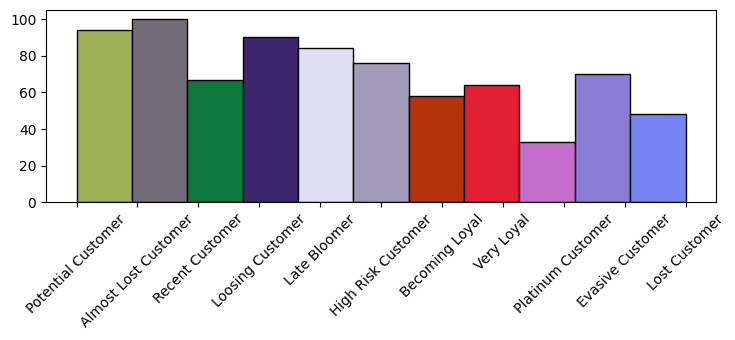

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Figure and set of subplots
fig, ax = plt.subplots()

# Example data (replace this with your column data)
data = rfm['detail_cust_title']

# Plot a histogram with your column data
N, bins, patches = ax.hist(data, bins=11, edgecolor='black', linewidth=1)

# Colors for each bar
colors = ['#' + ''.join(random.choices("ABCDEF" + string.digits, k=6)) for _ in range(11)]

# Assign colors to each bar
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [229]:
# Transpose the DataFrame
df_transposed = df_value_counts.transpose()

# Display the transposed DataFrame
df_transposed


0                   1                 2   \
detail_cust_title  Almost Lost Customer  Potential Customer  Loosing Customer   
count                               100                  94                90   

                             3                   4                 5   \
detail_cust_title  Late Bloomer  High Risk Customer  Evasive Customer   
count                        84                  76                70   

                                6           7               8              9   \
detail_cust_title  Recent Customer  Very Loyal  Becoming Loyal  Lost Customer   
count                           67          64              58             48   

                                  10  
detail_cust_title  Platinum Customer  
count                             33

IndexError: invalid index to scalar variable.

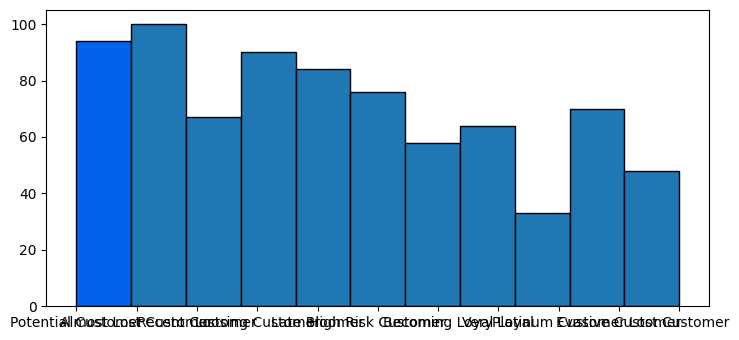

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Figure and set of subplots
fig, ax = plt.subplots()

# Example data (replace this with your column data)
data = rfm['detail_cust_title']

# Plot a histogram with your column data
N, bins, patches = ax.hist(data, bins=11, edgecolor='black', linewidth=1)

# Colors for each bar
colors = ['#' + ''.join(random.choices("ABCDEF" + string.digits, k=6)) for _ in range(11)]

# Assign colors to each bar and center the names under each bin
for patch, color, bin_value in zip(patches, colors, bins):
    patch.set_facecolor(color)
    bin_center = (bin_value[1] + bin_value[0]) / 2  # Calculate the midpoint of the bin
    ax.text(bin_center, 0, str(int(bin_center)), ha='center', va='bottom')

plt.xticks(rotation=45)

# Display the plot
plt.show()


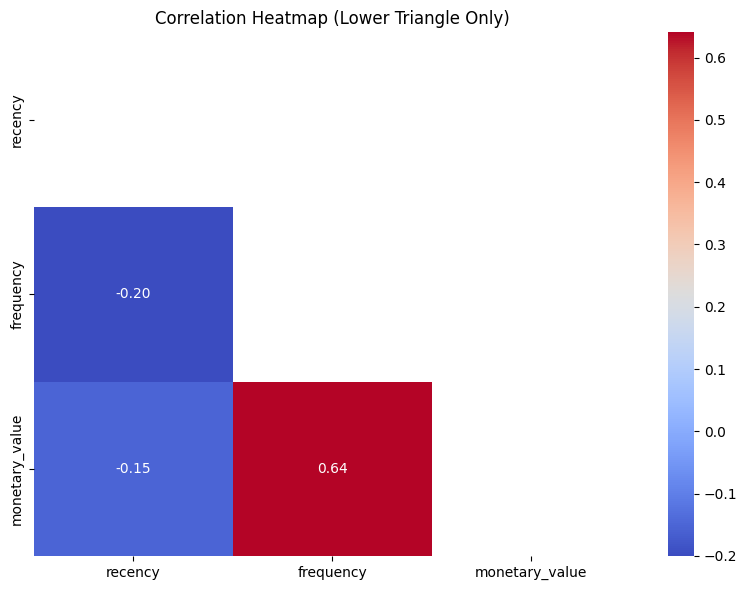

In [231]:


# Select the columns for which you want to calculate the correlation
selected_columns = ['recency', 'frequency', 'monetary_value']

# Calculate the correlation matrix
correlation_matrix = rfm[selected_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the heatmap with masked upper triangle
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap (Lower Triangle Only)')
plt.show()


In [232]:
# Select the columns for which you want to plot the pairplot
selected_columns = ['recency', 'frequency', 'monetary_value']

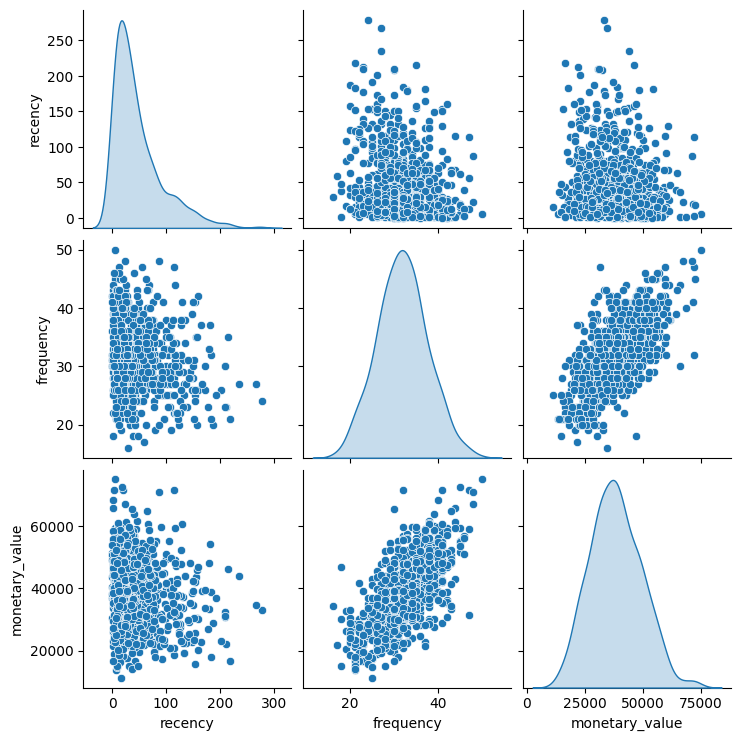

In [233]:

#Visualize the distribution of features in the dataset
sns.pairplot(rfm[selected_columns], diag_kind = 'kde');

In [234]:
#The skew() method is used to measure the asymmetry of the data around the mean.
rfm[selected_columns].skew()

recency           1.636399
frequency         0.105638
monetary_value    0.284006
dtype: float64

In [235]:


# square root value of the Recency feature
rfm_r_sqrt = np.sqrt(rfm['recency'])
rfm_rr_sqrt = np.sqrt(rfm_r_sqrt)

In [236]:

sqrt_data = pd.DataFrame({
    'recency': rfm_rr_sqrt,
    'frequency': rfm['frequency'],
    'monetary_value':rfm['monetary_value']
})

sqrt_data.head()


recency  frequency  monetary_value
0  2.087798         33     37761.94750
1  2.962257         36     37309.43750
2  1.861210         27     27260.40375
3  2.000000         34     24052.14375
4  2.432299         36     42242.59500

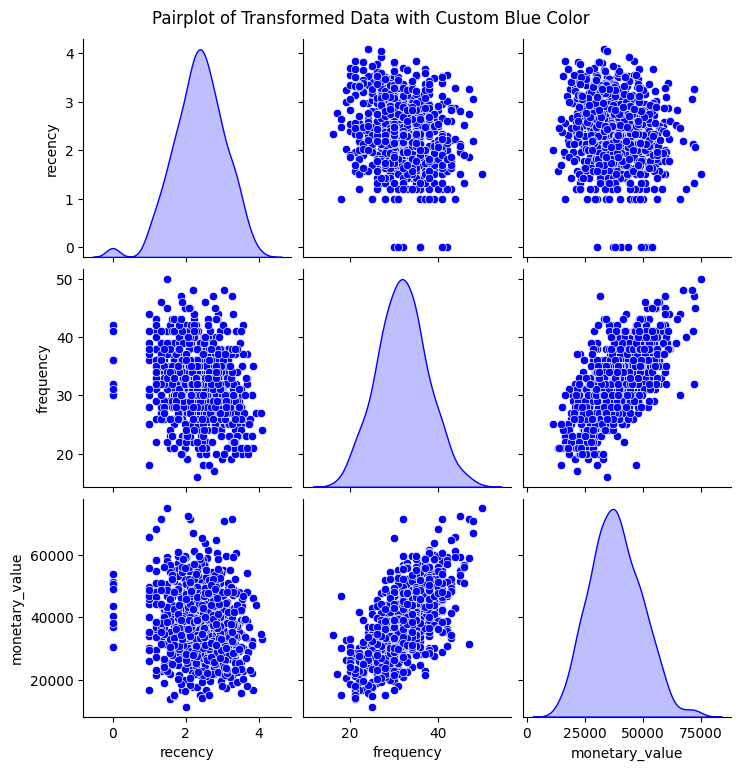

In [237]:

# Define a custom color for the plots
plot_color = "blue"

# Plotting the pairplot with the custom color for both scatter and KDE plots
sns.pairplot(sqrt_data, diag_kind='kde',
             plot_kws={'color': plot_color},
             diag_kws={'color': plot_color})
plt.suptitle('Pairplot of Transformed Data with Custom Blue Color', y=1.02)
plt.show()


In [238]:
sqrt_data.skew()

recency          -0.359185
frequency         0.105638
monetary_value    0.284006
dtype: float64

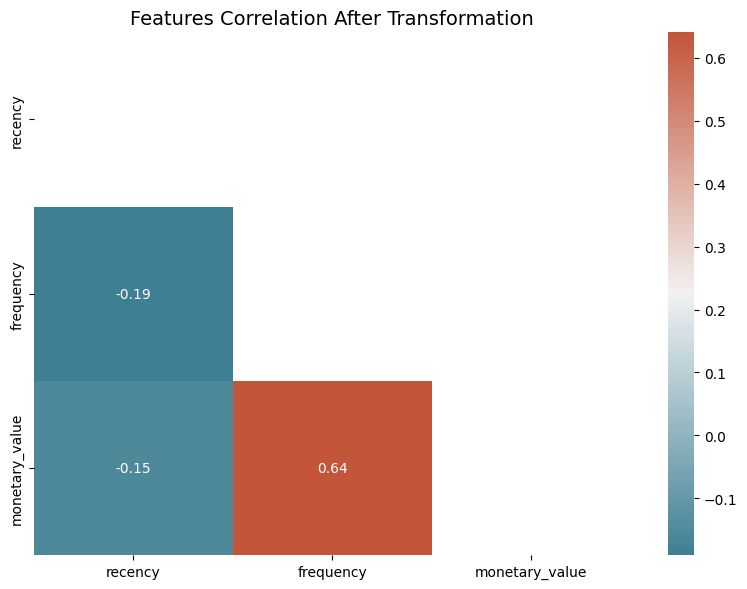

In [239]:
# Calculate the correlation matrix
corr_matrix = sqrt_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting the heatmap with customized colors
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, mask=mask)
plt.title('Features Correlation After Transformation', fontsize=14)
plt.show()

In [240]:
sqrt_data

recency  frequency  monetary_value
0    2.087798         33     37761.94750
1    2.962257         36     37309.43750
2    1.861210         27     27260.40375
3    2.000000         34     24052.14375
4    2.432299         36     42242.59500
..        ...        ...             ...
779  1.681793         33     48045.53875
780  2.189939         26     28010.48500
781  2.432299         26     34536.10125
782  1.861210         43     34246.53750
783  2.604291         33     48026.58125

[784 rows x 3 columns]

In [241]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply feature scaling to the specified features in sqrt_data
scaled_data = scaler.fit_transform(sqrt_data)

# Convert the scaled data array back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=sqrt_data.columns)


In [242]:
scaled_df

recency  frequency  monetary_value
0   -0.407197   0.192769       -0.052479
1    0.864443   0.712715       -0.093559
2   -0.736701  -0.847122       -1.005814
3   -0.534872   0.366084       -1.297061
4    0.093778   0.712715        0.354275
..        ...        ...             ...
779 -0.997610   0.192769        0.881069
780 -0.258663  -1.020438       -0.937721
781  0.093778  -1.020438       -0.345323
782 -0.736701   1.925921       -0.371610
783  0.343888   0.192769        0.879348

[784 rows x 3 columns]

In [243]:
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ignore the FutureWarning for the specific warning message
warnings.filterwarnings("ignore", category=FutureWarning)

silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
    # Initialize the K-Means model with number of clusters
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, random_state=42)

    # Fit the KMeans Model to the scaled data
    kmeans.fit(scaled_df)

    # Predict the cluster labels for each data point
    labels = kmeans.labels_

    # Calculate the Silhouette score
    silhouette = silhouette_score(scaled_df, labels)

    # Append the silhouette_score to the array
    silhouette_scores.append(silhouette)

    # Print the silhouette score
    print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')


Silhouette score for 2 clusters: 0.313
Silhouette score for 3 clusters: 0.253
Silhouette score for 4 clusters: 0.257
Silhouette score for 5 clusters: 0.261
Silhouette score for 6 clusters: 0.207
Silhouette score for 7 clusters: 0.240
Silhouette score for 8 clusters: 0.227
Silhouette score for 9 clusters: 0.239
Silhouette score for 10 clusters: 0.227
Silhouette score for 11 clusters: 0.232
Silhouette score for 12 clusters: 0.239
Silhouette score for 13 clusters: 0.238
Silhouette score for 14 clusters: 0.229
Silhouette score for 15 clusters: 0.224


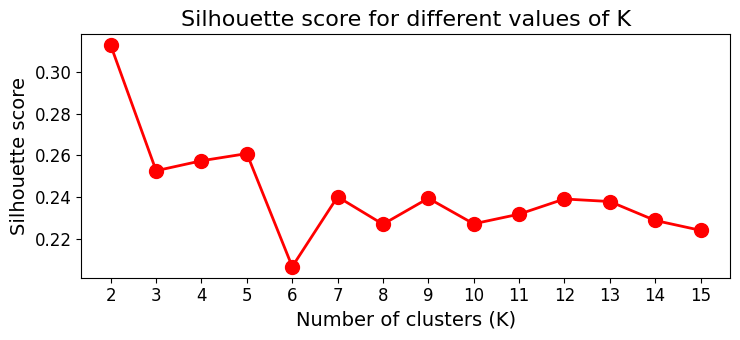

In [244]:
import matplotlib.pyplot as plt

# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [245]:
from sklearn.cluster import KMeans

# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the input data scaled_df to the KMeans model
kmeans.fit(scaled_df)

# Predict the cluster labels for the input data scaled_df using the trained KMeans model
y_kmeans = kmeans.predict(scaled_df)


In [246]:
scaled_df

recency  frequency  monetary_value
0   -0.407197   0.192769       -0.052479
1    0.864443   0.712715       -0.093559
2   -0.736701  -0.847122       -1.005814
3   -0.534872   0.366084       -1.297061
4    0.093778   0.712715        0.354275
..        ...        ...             ...
779 -0.997610   0.192769        0.881069
780 -0.258663  -1.020438       -0.937721
781  0.093778  -1.020438       -0.345323
782 -0.736701   1.925921       -0.371610
783  0.343888   0.192769        0.879348

[784 rows x 3 columns]

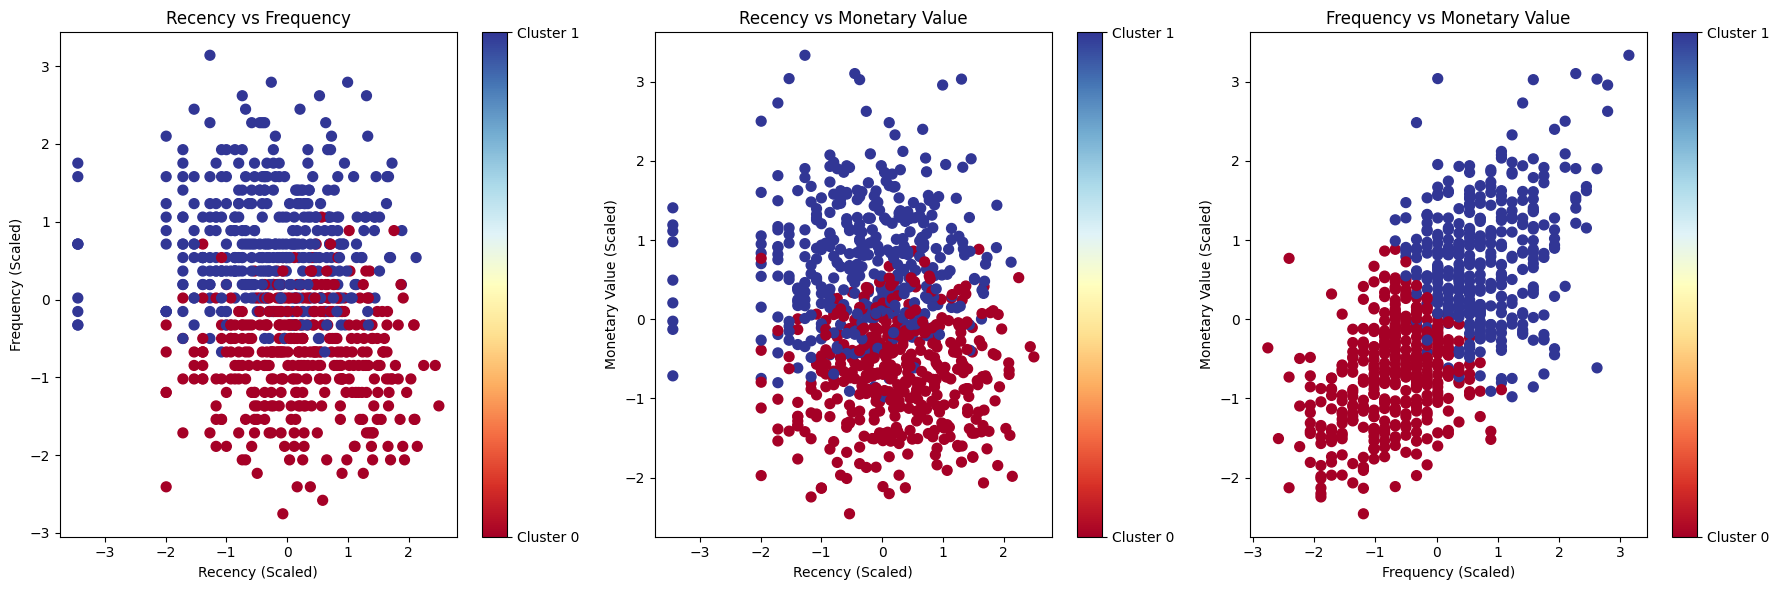

In [247]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and title for the scatter plots
plt.figure(figsize=(18, 6))

# Plot 1: Recency vs Frequency
plt.subplot(131)  # 1 row, 3 columns, 1st plot
plt.scatter(scaled_df['recency'], scaled_df['frequency'], c=y_kmeans, s=50, cmap='RdYlBu')
plt.xlabel('Recency (Scaled)')
plt.ylabel('Frequency (Scaled)')
plt.title('Recency vs Frequency')

# Plot 2: Recency vs Monetary Value
plt.subplot(132)  # 1 row, 3 columns, 2nd plot
plt.scatter(scaled_df['recency'], scaled_df['monetary_value'], c=y_kmeans, s=50, cmap='RdYlBu')
plt.xlabel('Recency (Scaled)')
plt.ylabel('Monetary Value (Scaled)')
plt.title('Recency vs Monetary Value')

# Plot 3: Frequency vs Monetary Value
plt.subplot(133)  # 1 row, 3 columns, 3rd plot
plt.scatter(scaled_df['frequency'], scaled_df['monetary_value'], c=y_kmeans, s=50, cmap='RdYlBu')
plt.xlabel('Frequency (Scaled)')
plt.ylabel('Monetary Value (Scaled)')
plt.title('Frequency vs Monetary Value')

# Add a color bar to each plot to show the correspondence between the colors and the cluster labels
for ax in plt.gcf().axes:
    try:
        color_bar = plt.colorbar(ax.collections[0], ax=ax)
        color_bar.set_ticks(np.unique(y_kmeans))
        color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])
    except Exception as e:
        pass  # Ignore plots without scatter points

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


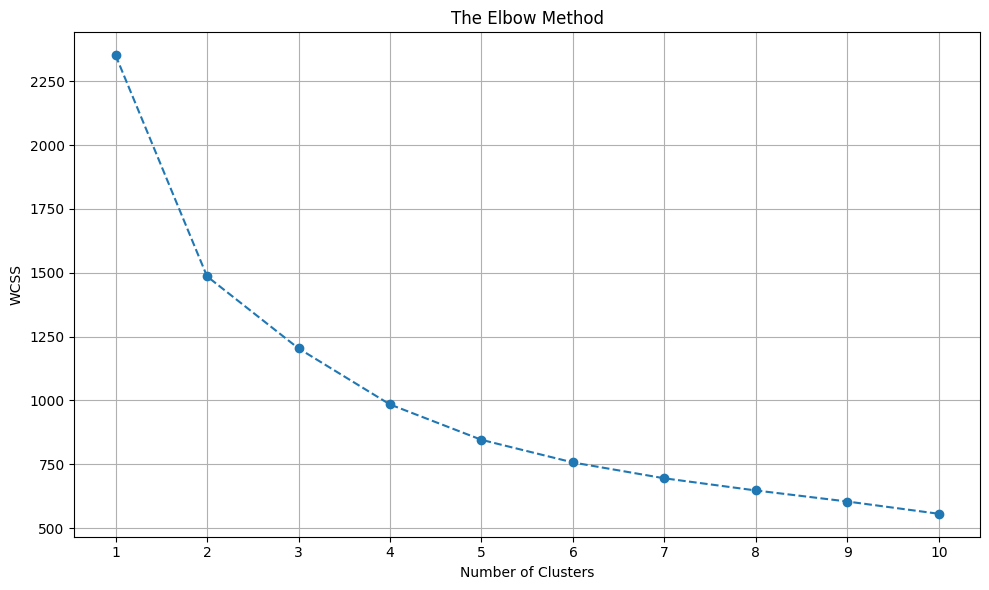

In [248]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Initialize an empty list to store the WCSS values for different number of clusters
wcss = []

# Create a range of numbers from 1 to 10 (inclusive)
num_clusters_range = range(1, 11)

# Loop over each number of clusters
for num_clusters in num_clusters_range:
    # Create a KMeans instance for the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans model to the input data scaled_df (assuming scaled_df is your data)
    kmeans.fit(scaled_df)

    # Append the WCSS value (inertia) to the list for the current number of clusters
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


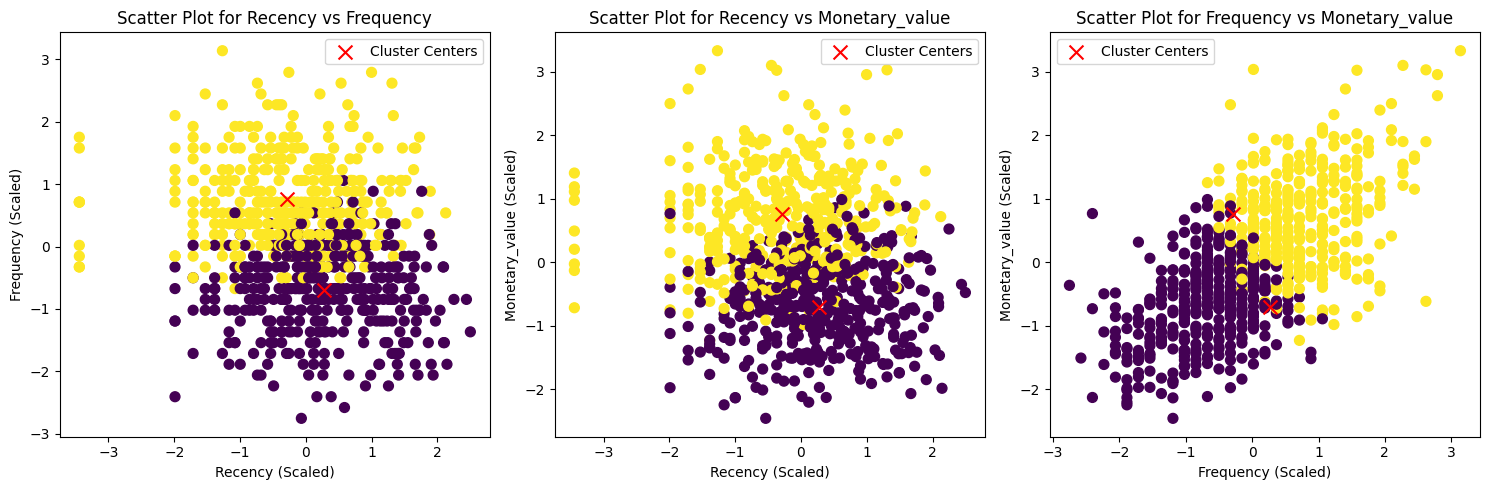

In [249]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'scaled_df' has been scaled and contains 'recency', 'frequency', and 'monetary_value' columns
# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit KMeans to the scaled data
kmeans.fit(scaled_df)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Define the feature pairs to plot
feature_pairs = [('recency', 'frequency'), ('recency', 'monetary_value'), ('frequency', 'monetary_value')]

# Set the figure size for subplots
plt.figure(figsize=(15, 5))

# Plot each pair of features in a subplot
for i, (feature_x, feature_y) in enumerate(feature_pairs, 1):
    plt.subplot(1, 3, i)
    plt.scatter(scaled_df[feature_x], scaled_df[feature_y], c=cluster_labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100, label='Cluster Centers')
    plt.xlabel(f'{feature_x.capitalize()} (Scaled)')
    plt.ylabel(f'{feature_y.capitalize()} (Scaled)')
    plt.title(f'Scatter Plot for {feature_x.capitalize()} vs {feature_y.capitalize()}')
    plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


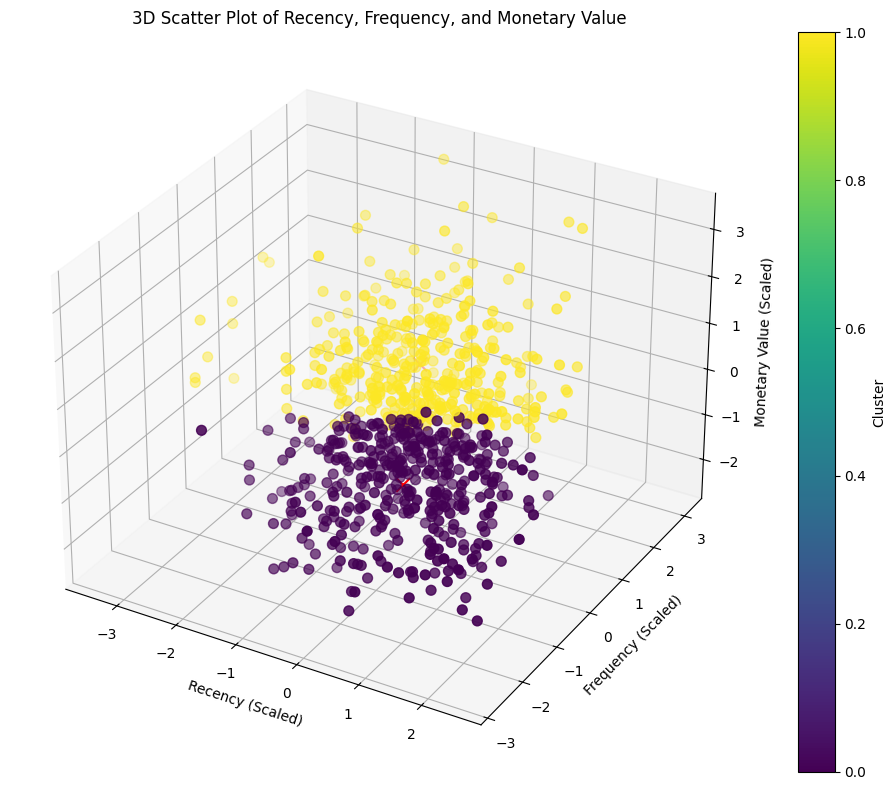

In [250]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with cluster labels
scatter = ax.scatter(scaled_df['recency'], scaled_df['frequency'], scaled_df['monetary_value'], c=cluster_labels, cmap='viridis', s=50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', c='red', s=100, label='Cluster Centers')

# Set labels and title
ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary Value (Scaled)')
ax.set_title('3D Scatter Plot of Recency, Frequency, and Monetary Value')

# Add a colorbar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Show the plot
plt.show()


In [251]:
import plotly.express as px
from sklearn.cluster import KMeans

# Assuming 'scaled_df' has been scaled and contains 'recency', 'frequency', and 'monetary_value' columns
# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit KMeans to the scaled data
kmeans.fit(scaled_df)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Function to create 3D scatter plots with different axis combinations
def create_3d_scatter_plot(x_axis, y_axis, z_axis, title):
    fig = px.scatter_3d(scaled_df, x=x_axis, y=y_axis, z=z_axis,
                        color=cluster_labels, labels={'color': 'Cluster Label'},
                        title=title)

    # Add cluster centers to the plot
    cluster_centers = kmeans.cluster_centers_
    fig.add_trace(go.Scatter3d(x=[cluster_centers[0][0]], y=[cluster_centers[0][1]], z=[cluster_centers[0][2]],
                               mode='markers', marker=dict(size=5, color='red'), name='Cluster Center 1'))
    fig.add_trace(go.Scatter3d(x=[cluster_centers[1][0]], y=[cluster_centers[1][1]], z=[cluster_centers[1][2]],
                               mode='markers', marker=dict(size=5, color='green'), name='Cluster Center 2'))

    # Show the plot
    fig.show()

# Create 3D scatter plots with different axis combinations
create_3d_scatter_plot('recency', 'frequency', 'monetary_value', 'Recency vs Frequency vs Monetary Value')
create_3d_scatter_plot('recency', 'monetary_value', 'frequency', 'Recency vs Monetary Value vs Frequency')
create_3d_scatter_plot('frequency', 'recency', 'monetary_value', 'Frequency vs Recency vs Monetary Value')
create_3d_scatter_plot('frequency', 'monetary_value', 'recency', 'Frequency vs Monetary Value vs Recency')
create_3d_scatter_plot('monetary_value', 'recency', 'frequency', 'Monetary Value vs Recency vs Frequency')
create_3d_scatter_plot('monetary_value', 'frequency', 'recency', 'Monetary Value vs Frequency vs Recency')


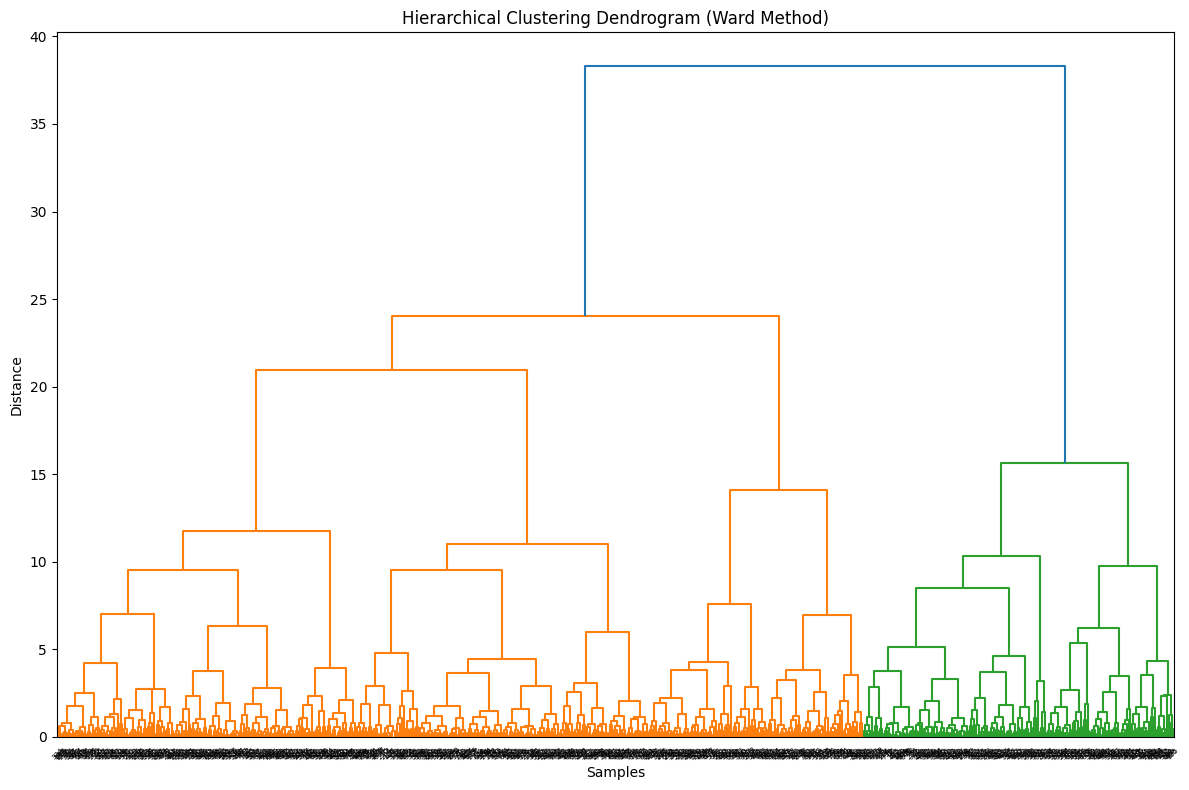

In [252]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming scaled_df is your DataFrame with scaled data

# Calculate the linkage matrix using Ward method
linkage_matrix = linkage(scaled_df, method='ward')

# Create a figure for the dendrogram
plt.figure(figsize=(12, 8))

# Plot the dendrogram using scipy's dendrogram function
dendrogram(linkage_matrix, orientation='top', labels=scaled_df.index, distance_sort='descending')

plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [253]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Assuming scaled_df is your DataFrame with scaled data

# Create an instance of AgglomerativeClustering with specified parameters
agg_cluster = AgglomerativeClustering(n_clusters=2, metric ='euclidean', linkage='complete')

# Fit the clustering model to your standardized data
cluster_labels = agg_cluster.fit_predict(scaled_df)

# Create a copy of scaled_df to avoid modifying the original DataFrame
df_with_clusters = scaled_df.copy()

# Add the cluster labels to the DataFrame
df_with_clusters['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels
print(df_with_clusters)


      recency  frequency  monetary_value  Cluster
0   -0.407197   0.192769       -0.052479        1
1    0.864443   0.712715       -0.093559        1
2   -0.736701  -0.847122       -1.005814        1
3   -0.534872   0.366084       -1.297061        1
4    0.093778   0.712715        0.354275        1
..        ...        ...             ...      ...
779 -0.997610   0.192769        0.881069        0
780 -0.258663  -1.020438       -0.937721        1
781  0.093778  -1.020438       -0.345323        1
782 -0.736701   1.925921       -0.371610        1
783  0.343888   0.192769        0.879348        1

[784 rows x 4 columns]


In [254]:
df_with_clusters

recency  frequency  monetary_value  Cluster
0   -0.407197   0.192769       -0.052479        1
1    0.864443   0.712715       -0.093559        1
2   -0.736701  -0.847122       -1.005814        1
3   -0.534872   0.366084       -1.297061        1
4    0.093778   0.712715        0.354275        1
..        ...        ...             ...      ...
779 -0.997610   0.192769        0.881069        0
780 -0.258663  -1.020438       -0.937721        1
781  0.093778  -1.020438       -0.345323        1
782 -0.736701   1.925921       -0.371610        1
783  0.343888   0.192769        0.879348        1

[784 rows x 4 columns]

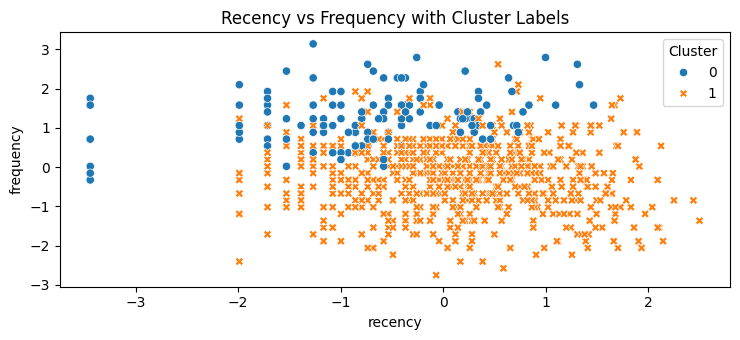

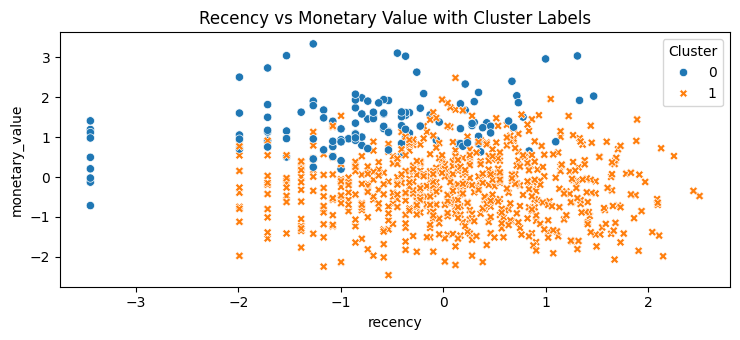

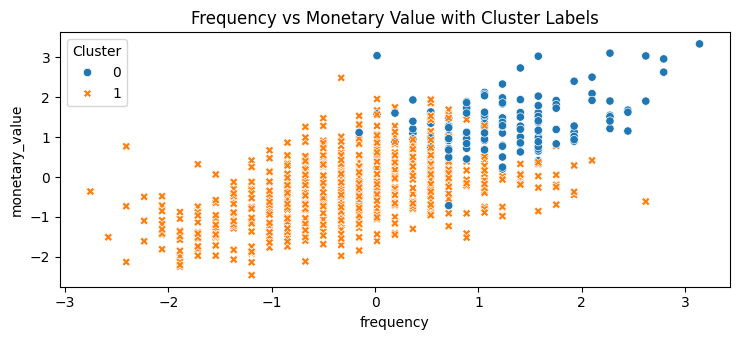

In [255]:

# Plotting different combinations of features
sns.scatterplot(data=df_with_clusters, x='recency', y='frequency', hue='Cluster', style='Cluster')
plt.title('Recency vs Frequency with Cluster Labels')
plt.show()

sns.scatterplot(data=df_with_clusters, x='recency', y='monetary_value', hue='Cluster', style='Cluster')
plt.title('Recency vs Monetary Value with Cluster Labels')
plt.show()

sns.scatterplot(data=df_with_clusters, x='frequency', y='monetary_value', hue='Cluster', style='Cluster')
plt.title('Frequency vs Monetary Value with Cluster Labels')
plt.show()


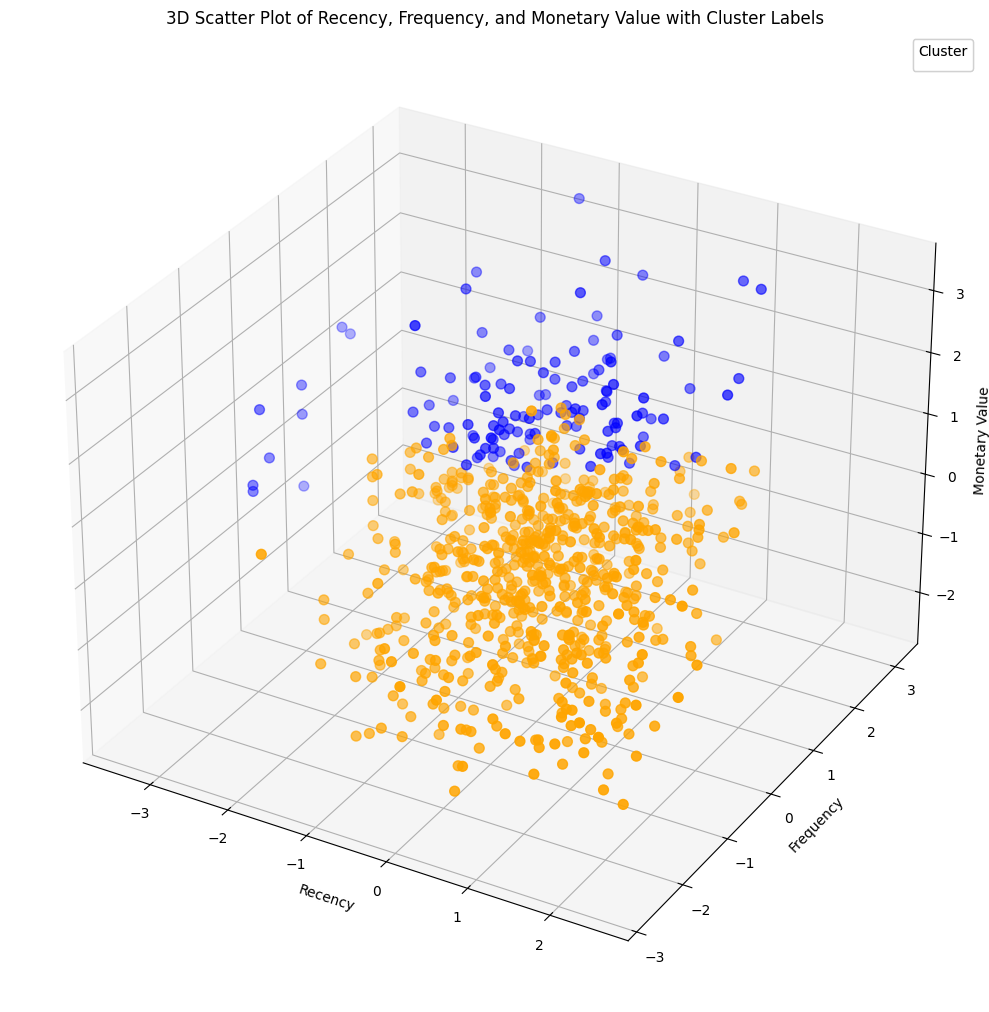

In [261]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for Recency, Frequency, and Monetary Value with Cluster Labels
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_with_clusters['recency'], df_with_clusters['frequency'], df_with_clusters['monetary_value'], 
                     c=df_with_clusters['Cluster'].map({0: 'blue', 1: 'orange'}), s=50, label='Cluster')

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Scatter Plot of Recency, Frequency, and Monetary Value with Cluster Labels')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend1)

# Save the plot as a PNG file
plt.savefig('3d_scatter_plot_with_clusters.png', bbox_inches='tight')

plt.show()


In [81]:
from sklearn.metrics import silhouette_score

# Assuming cluster_labels contains the cluster labels assigned by your clustering algorithm
cluster_labels = df_with_clusters['Cluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_with_clusters[['recency', 'frequency', 'monetary_value']], cluster_labels)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.30545333914136635


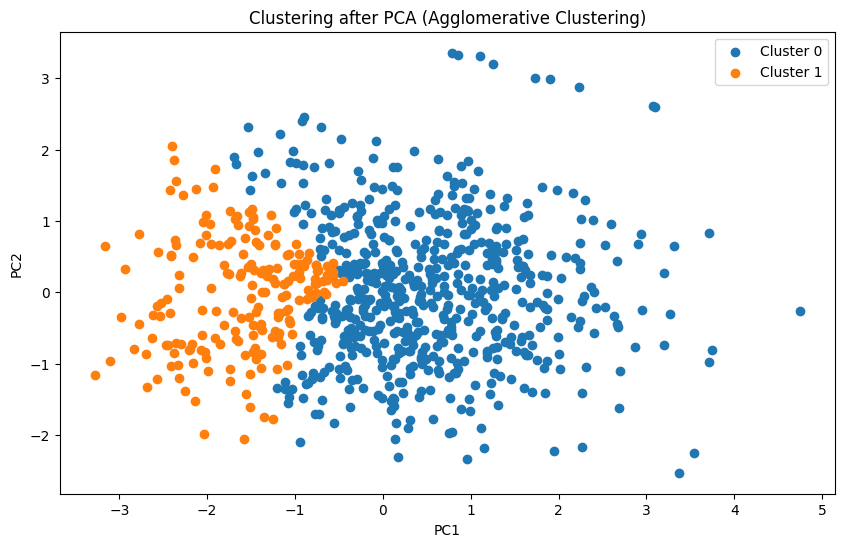

In [82]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Perform PCA on df_with_clusters
pca = PCA(n_components=2)
pc_results = pca.fit_transform(df_with_clusters[['recency', 'frequency', 'monetary_value']])
pc_df = pd.DataFrame(pc_results, columns=['PC1', 'PC2'])

# Perform clustering with Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(pc_df)

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(2):  # Assuming you have 2 clusters
    cluster_data = pc_df[agg_labels == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

plt.title('Clustering after PCA (Agglomerative Clustering)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [83]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for Agglomerative Clustering
agg_silhouette_avg = silhouette_score(pc_df, agg_labels)

# Display silhouette score for Agglomerative Clustering
print("Silhouette Score for Agglomerative Clustering:", agg_silhouette_avg)


Silhouette Score for Agglomerative Clustering: 0.30844563010765363


# DBSCAN on RFM

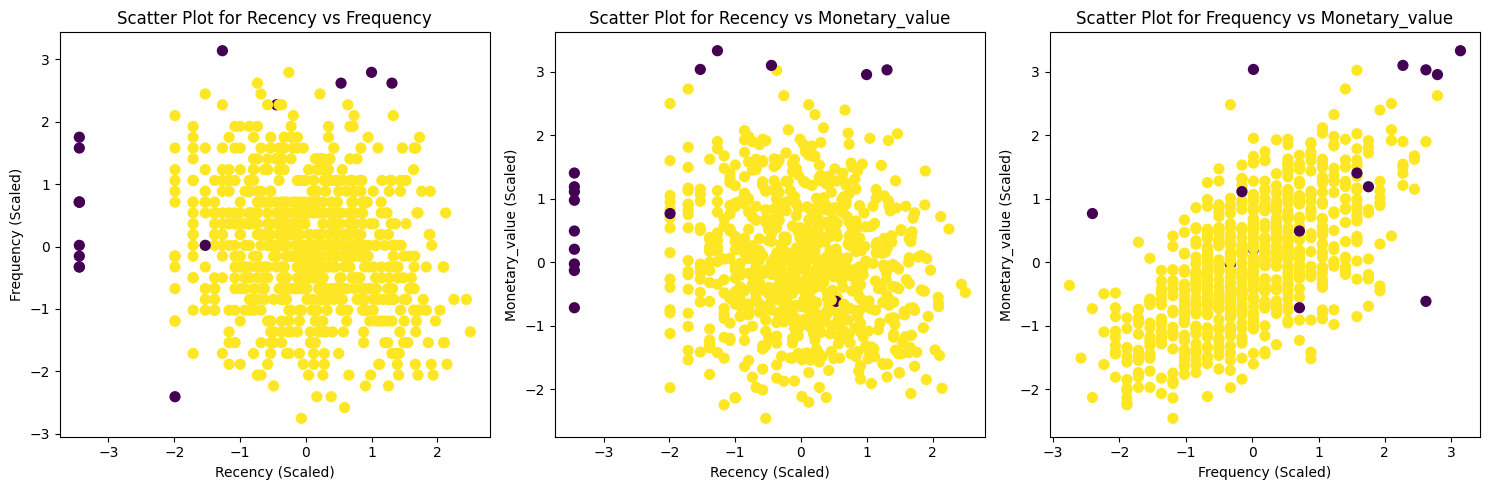

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Hyperparameter tuning for DBSCAN
silhouette_scores = []
eps_values = [0.1, 0.5, 1.0]  # Epsilon values to try
min_samples_values = [5, 10, 15]  # Min samples values to try

for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize DBSCAN with the current epsilon and min_samples values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(scaled_df)
        
        # Get the cluster labels
        cluster_labels = dbscan.labels_
        
        # Check if there are more than one cluster
        if len(set(cluster_labels)) > 1:
            # Calculate silhouette score
            silhouette_scores.append((eps, min_samples, silhouette_score(scaled_df, cluster_labels)))

# Find the optimal hyperparameters based on the highest silhouette score
optimal_eps, optimal_min_samples, _ = max(silhouette_scores, key=lambda x: x[2])

# Initialize DBSCAN with the optimal hyperparameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan.fit(scaled_df)

# Get the cluster labels for each data point
cluster_labels = dbscan.labels_

# Check if there are more than one cluster
if len(set(cluster_labels)) > 1:
    # Define the feature pairs to plot
    feature_pairs = [('recency', 'frequency'), ('recency', 'monetary_value'), ('frequency', 'monetary_value')]

    # Set the figure size for subplots
    plt.figure(figsize=(15, 5))

    # Plot each pair of features in a subplot
    for i, (feature_x, feature_y) in enumerate(feature_pairs, 1):
        plt.subplot(1, 3, i)
        plt.scatter(scaled_df[feature_x], scaled_df[feature_y], c=cluster_labels, cmap='viridis', s=50)
        plt.xlabel(f'{feature_x.capitalize()} (Scaled)')
        plt.ylabel(f'{feature_y.capitalize()} (Scaled)')
        plt.title(f'Scatter Plot for {feature_x.capitalize()} vs {feature_y.capitalize()}')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()
else:
    print("DBSCAN did not find meaningful clusters.")


In [91]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Hyperparameter tuning for DBSCAN
silhouette_scores = []
eps_values = [0.1, 0.5, 1.0]  # Epsilon values to try
min_samples_values = [5, 10, 15]  # Min samples values to try

for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize DBSCAN with the current epsilon and min_samples values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(scaled_df)
        
        # Get the cluster labels
        cluster_labels = dbscan.labels_
        
        # Check if there are more than one cluster
        if len(set(cluster_labels)) > 1:
            # Calculate silhouette score
            silhouette_scores.append((eps, min_samples, silhouette_score(scaled_df, cluster_labels), len(set(cluster_labels))))

# Find the optimal hyperparameters based on the highest silhouette score
optimal_eps, optimal_min_samples, _, num_clusters = max(silhouette_scores, key=lambda x: x[2])

# Initialize DBSCAN with the optimal hyperparameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan.fit(scaled_df)

# Get the cluster labels for each data point
cluster_labels = dbscan.labels_

# Check if there are more than one cluster
if num_clusters > 1:
    # Get unique cluster labels (excluding noise, which is labeled as -1)
    unique_labels = np.unique(cluster_labels)
    unique_labels = unique_labels[unique_labels != -1]

    # Initialize lists to store cluster centers and noise points
    cluster_centers = []
    noise_points = []

    # Find one center for each cluster
    for label in unique_labels:
        cluster_mask = (cluster_labels == label)
        cluster_data = scaled_df[cluster_mask]
        cluster_center = np.mean(cluster_data, axis=0)
        cluster_centers.append(cluster_center)

    # Find noise points
    noise_mask = (cluster_labels == -1)
    noise_points = scaled_df[noise_mask]

    # Print cluster centers and noise points
    print("Cluster Centers:")
    for i, center in enumerate(cluster_centers):
        print(f"Cluster {i+1} Center: {center}")

    print("\nNoise Points:")
    print(noise_points)

    # Print the silhouette score and number of clusters
    print("\nOptimal Hyperparameters:")
    print(f"Epsilon: {optimal_eps}, Min Samples: {optimal_min_samples}")
    print(f"Number of Clusters: {num_clusters}")
    print(f"Silhouette Score: {silhouette_score(scaled_df, cluster_labels)}")

else:
    print("DBSCAN did not find meaningful clusters.")


Cluster Centers:
Cluster 1 Center: recency           0.043468
frequency        -0.020490
monetary_value   -0.026244
dtype: float64

Noise Points:
      recency  frequency  monetary_value
59   1.308444   2.619182        3.033702
87  -3.443275  -0.327177       -0.127432
145 -0.447959   2.272552        3.103632
237 -3.443275   0.019454        0.207051
256 -1.268737   3.139128        3.335065
301 -3.443275   1.752606        1.191826
480 -3.443275   0.712715        0.494428
560 -3.443275  -0.327177       -0.024549
562 -1.989074  -2.406960        0.769493
575 -3.443275  -0.153861        1.114563
592 -3.443275   0.712715        0.978939
593 -3.443275   0.712715       -0.714518
606  0.997966   2.792498        2.958874
665  0.534787   2.619182       -0.613691
735 -3.443275   1.579291        1.407918
744 -1.529438   0.019454        3.040118

Optimal Hyperparameters:
Epsilon: 1.0, Min Samples: 10
Number of Clusters: 2
Silhouette Score: 0.4383833637073182


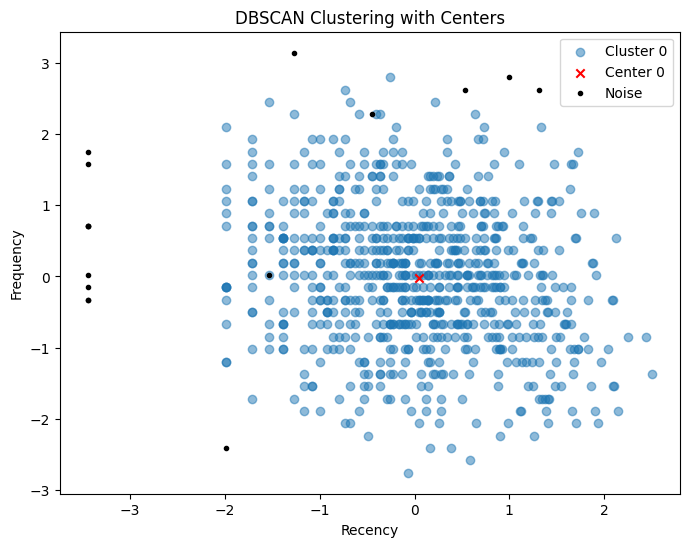

In [92]:
import matplotlib.pyplot as plt

# Get the unique cluster labels (excluding noise, which is labeled as -1)
unique_labels = np.unique(cluster_labels)
unique_labels = unique_labels[unique_labels != -1]

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot each cluster along with its center
for label in unique_labels:
    # Get data points for the current cluster
    cluster_mask = (cluster_labels == label)
    cluster_data = scaled_df[cluster_mask]

    # Plot data points
    plt.scatter(cluster_data['recency'], cluster_data['frequency'], label=f'Cluster {label}', alpha=0.5)

    # Plot cluster center
    cluster_center = cluster_centers[label]
    plt.scatter(cluster_center[0], cluster_center[1], marker='x', color='red', label=f'Center {label}')

# Plot noise points
plt.scatter(noise_points['recency'], noise_points['frequency'], color='black', marker='.', label='Noise')

# Add labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('DBSCAN Clustering with Centers')

# Add legend
plt.legend()

# Show plot
plt.show()


In [97]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range of hyperparameters
eps_range = np.linspace(0.1, 5, 50)
min_samples_range = range(5, 26)

best_score = -1
best_params = {'eps': None, 'min_samples': None}
best_labels = None

# Perform grid search
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df)
        
        # Check if the number of clusters is 2 or 3
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters == 2 or n_clusters == 3:
            silhouette = silhouette_score(scaled_df, labels)
            if silhouette > best_score:
                best_score = silhouette
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples
                best_labels = labels

# Print the best parameters and silhouette score
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'eps': 1.1, 'min_samples': 5}
Best Silhouette Score: 0.4032578636573715


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

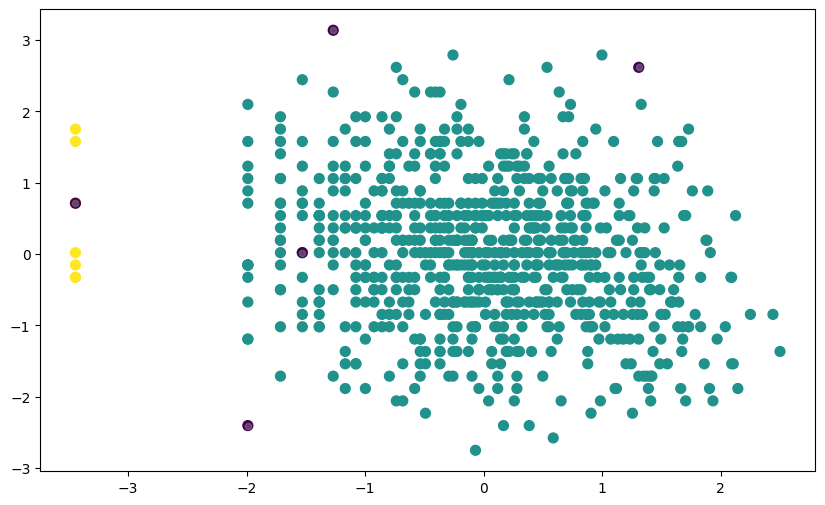

In [98]:
import matplotlib.pyplot as plt

# Extract core samples and labels
core_samples_mask = np.zeros_like(best_labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(best_labels)) - (1 if -1 in best_labels else 0)
n_noise_ = list(best_labels).count(-1)

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot core samples
plt.scatter(scaled_df.iloc[core_samples_mask, 0], scaled_df.iloc[core_samples_mask, 1], 
            c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')

# Plot noise points
plt.scatter(scaled_df.iloc[best_labels == -1, 0], scaled_df.iloc[best_labels == -1, 1], 
            c='gray', s=20, alpha=0.5, label='Noise Points')

# Plot cluster centroids
centroids = dbscan.components_.mean(axis=0)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100, label='Cluster Centroids')

plt.title('DBSCAN Clustering with Core and Noise Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


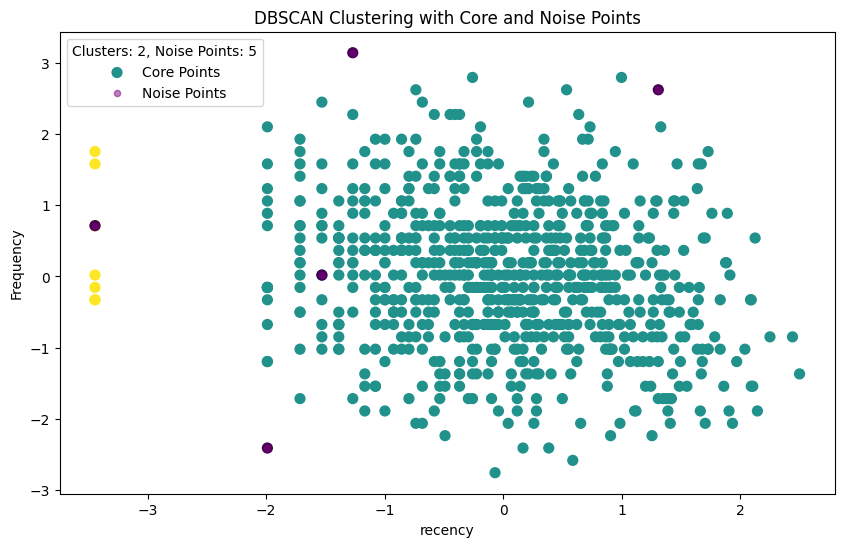

In [104]:
import matplotlib.pyplot as plt

# Extract core samples and labels
core_samples_mask = np.zeros_like(best_labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(best_labels)) - (1 if -1 in best_labels else 0)
n_noise_ = list(best_labels).count(-1)

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot core samples
plt.scatter(scaled_df.iloc[core_samples_mask, 0], scaled_df.iloc[core_samples_mask, 1], 
            c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')

# Plot noise points with purple color and circular marker
plt.scatter(scaled_df.iloc[best_labels == -1, 0], scaled_df.iloc[best_labels == -1, 1], 
            c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')

plt.title('DBSCAN Clustering with Core and Noise Points')
plt.xlabel('recency')
plt.ylabel('Frequency')

# Modify legend to include noise points
plt.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_))
plt.show()


In [103]:
scaled_df.columns

Index(['recency', 'frequency', 'monetary_value'], dtype='object')

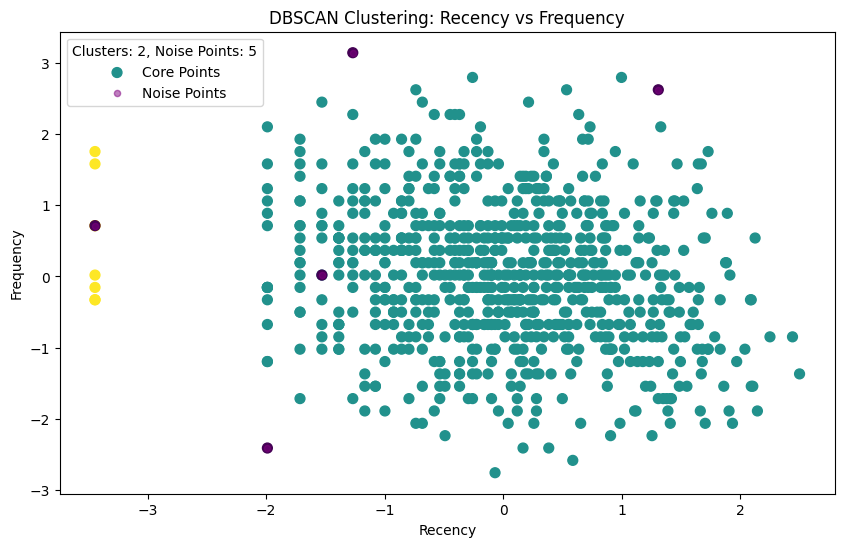

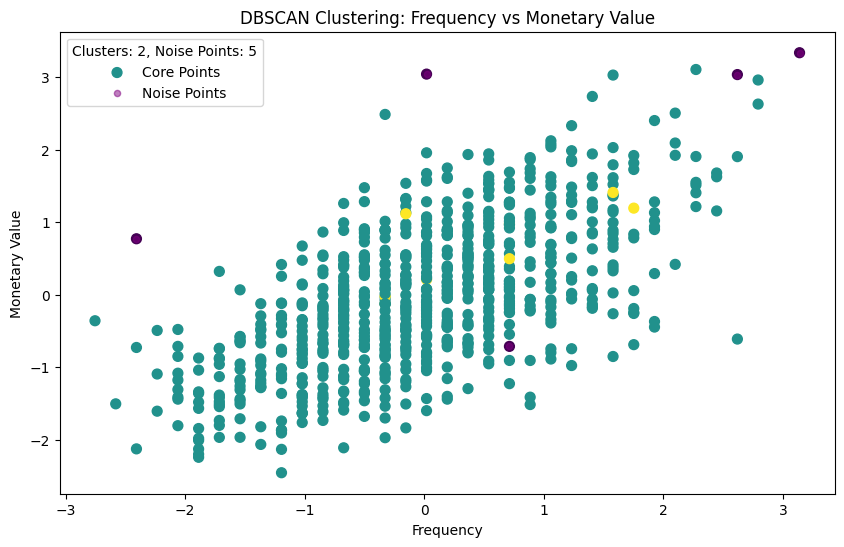

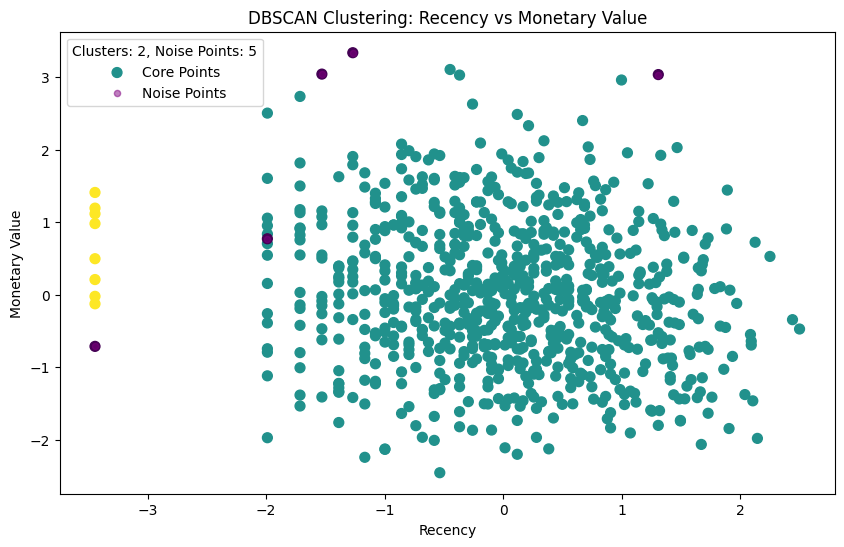

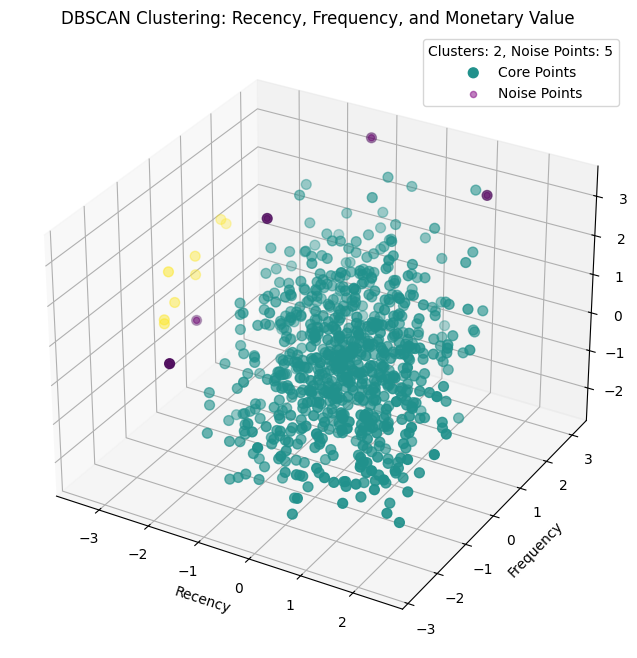

In [106]:
import matplotlib.pyplot as plt

# Plot the clusters for Recency vs Frequency
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[core_samples_mask, 0], scaled_df.iloc[core_samples_mask, 1], 
            c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')
plt.scatter(scaled_df.iloc[best_labels == -1, 0], scaled_df.iloc[best_labels == -1, 1], 
            c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')
plt.title('DBSCAN Clustering: Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_))
plt.show()

# Plot the clusters for Frequency vs Monetary Value
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[core_samples_mask, 1], scaled_df.iloc[core_samples_mask, 2], 
            c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')
plt.scatter(scaled_df.iloc[best_labels == -1, 1], scaled_df.iloc[best_labels == -1, 2], 
            c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')
plt.title('DBSCAN Clustering: Frequency vs Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_))
plt.show()

# Plot the clusters for Recency vs Monetary Value
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[core_samples_mask, 0], scaled_df.iloc[core_samples_mask, 2], 
            c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')
plt.scatter(scaled_df.iloc[best_labels == -1, 0], scaled_df.iloc[best_labels == -1, 2], 
            c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')
plt.title('DBSCAN Clustering: Recency vs Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_))
plt.show()

# 3D plot for Recency, Frequency, and Monetary Value
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_df.iloc[core_samples_mask, 0], scaled_df.iloc[core_samples_mask, 1], scaled_df.iloc[core_samples_mask, 2],
           c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')
ax.scatter(scaled_df.iloc[best_labels == -1, 0], scaled_df.iloc[best_labels == -1, 1], scaled_df.iloc[best_labels == -1, 2],
           c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')
ax.set_title('DBSCAN Clustering: Recency, Frequency, and Monetary Value')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_))
plt.show()


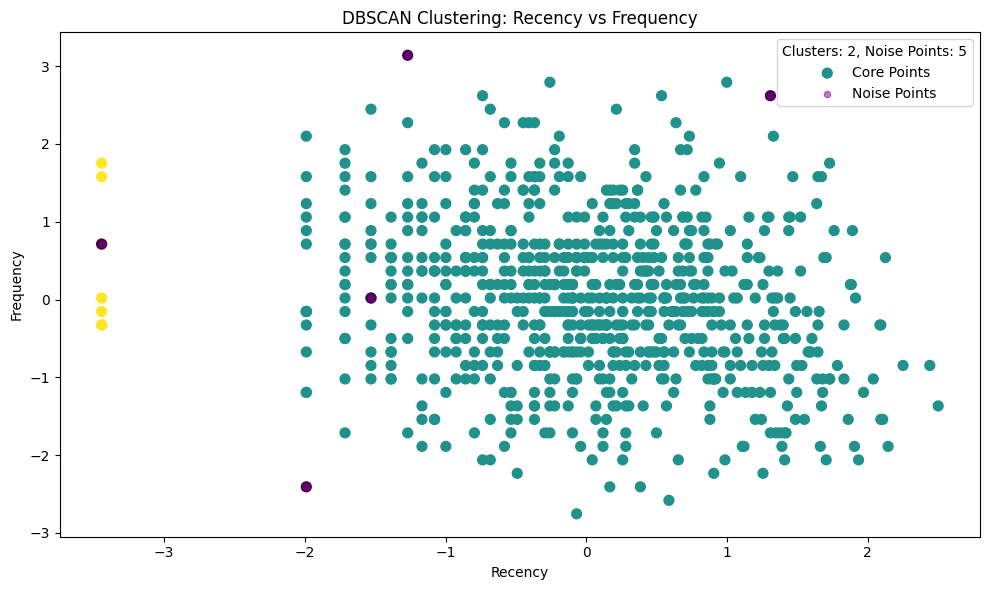

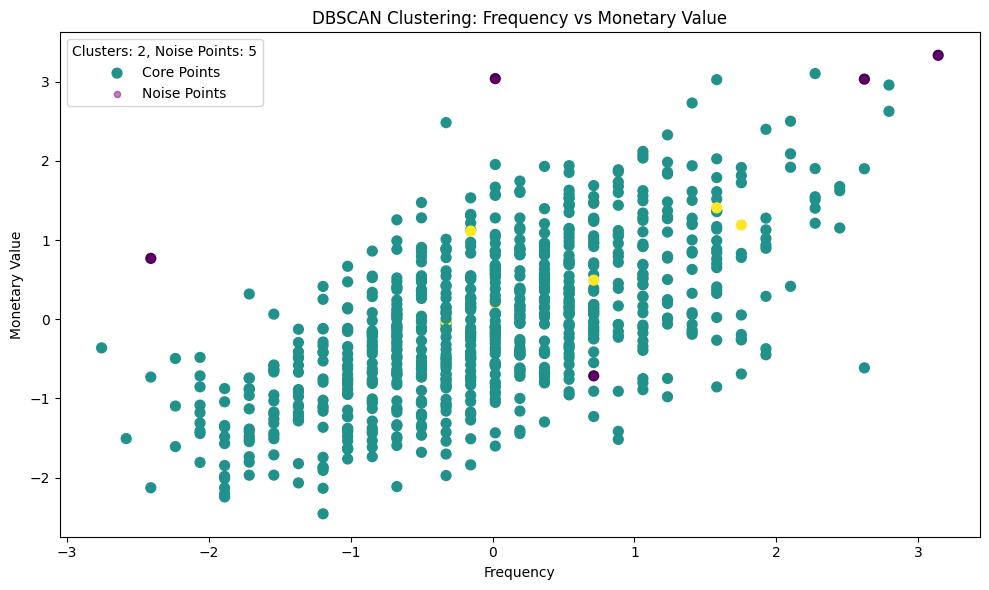

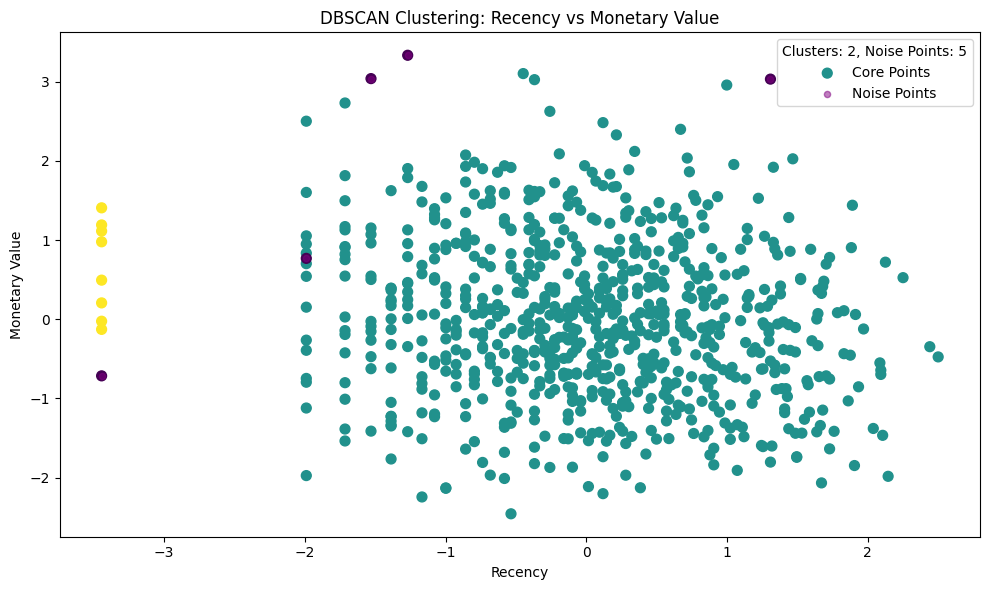

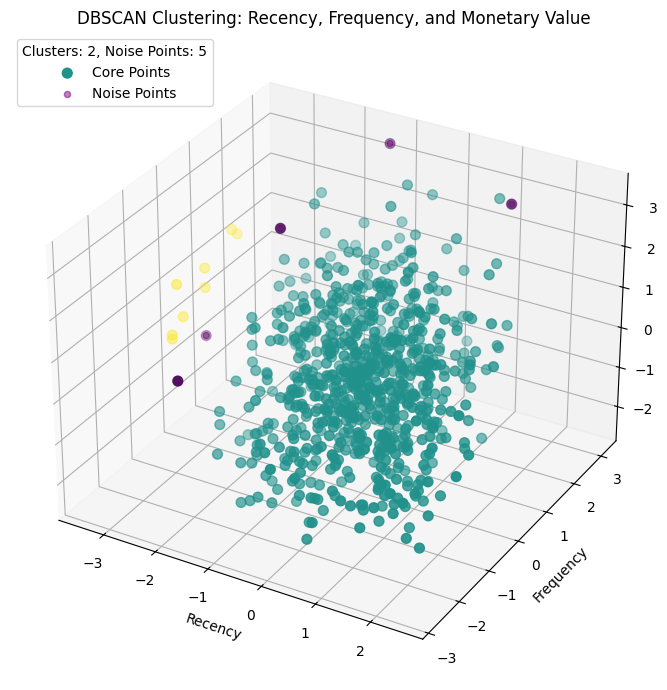

In [169]:
import matplotlib.pyplot as plt

# Plot the clusters for Recency vs Frequency
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[core_samples_mask, 0], scaled_df.iloc[core_samples_mask, 1], 
            c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')
plt.scatter(scaled_df.iloc[best_labels == -1, 0], scaled_df.iloc[best_labels == -1, 1], 
            c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')
plt.title('DBSCAN Clustering: Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_))
plt.show()

# Plot the clusters for Frequency vs Monetary Value
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[core_samples_mask, 1], scaled_df.iloc[core_samples_mask, 2], 
            c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')
plt.scatter(scaled_df.iloc[best_labels == -1, 1], scaled_df.iloc[best_labels == -1, 2], 
            c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')
plt.title('DBSCAN Clustering: Frequency vs Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_))
plt.show()

# Plot the clusters for Recency vs Monetary Value
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[core_samples_mask, 0], scaled_df.iloc[core_samples_mask, 2], 
            c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')
plt.scatter(scaled_df.iloc[best_labels == -1, 0], scaled_df.iloc[best_labels == -1, 2], 
            c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')
plt.title('DBSCAN Clustering: Recency vs Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_))
plt.show()

# 3D plot for Recency, Frequency, and Monetary Value
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_df.iloc[core_samples_mask, 0], scaled_df.iloc[core_samples_mask, 1], scaled_df.iloc[core_samples_mask, 2],
           c=best_labels[core_samples_mask], cmap='viridis', s=50, label='Core Points')
ax.scatter(scaled_df.iloc[best_labels == -1, 0], scaled_df.iloc[best_labels == -1, 1], scaled_df.iloc[best_labels == -1, 2],
           c='purple', s=20, alpha=0.5, marker='o', label='Noise Points')
ax.set_title('DBSCAN Clustering: Recency, Frequency, and Monetary Value')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value', labelpad=10)  # Adjust label padding for better visibility
ax.legend(title='Clusters: %d, Noise Points: %d' % (n_clusters_, n_noise_), loc='upper left')
plt.show()


In [ ]:
def create_3d_scatter_plot(x_axis, y_axis, z_axis, title):
    fig = px.scatter_3d(scaled_df, x=x_axis, y=y_axis, z=z_axis,
                        color=cluster_labels, labels={'color': 'Cluster Label'},
                        title=title)

In [107]:
df.head(5)

order_id order_date order_priority  ship_date  \
0  ddb2de3d-ded3-4715-97cf-69becc54d95a 2022-03-16            Low 2022-03-18   
1  c4d92cf0-fee8-41e8-904d-b132eb429e24 2019-09-26       Critical 2019-10-01   
2  cc09b9ad-a17d-42bf-835e-d35cc66e30f9 2022-09-10           High 2022-09-15   
3  7c955c6b-ca70-4b97-a9f8-a38af866b506 2022-02-10       Critical 2022-02-11   
4  8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a 2020-11-02  Not Specified 2020-11-04   

        ship_mode customer_id  customer_age customer_segment        country  \
0     Express Air    a2b28c3f            59        Corporate  United States   
1  Delivery Truck    0375660f            73         Consumer  United States   
2  Delivery Truck    fb823f3d            43      Home Office  United States   
3     Regular Air    17771651            30         Consumer  United States   
4     Regular Air    8e721b69            44   Small Business  United States   

             city  ...   region  product_id product_category  \
0   Bullhead City  ...     West    eeb8cd3f  Office Supplies   
1    Grand Island  ...  Central    f235a01b       Technology   
2      Georgetown  ...  Central    44f572ea       Technology   
3       Dix Hills  ...     East    e56df987        Furniture   
4  Harker Heights  ...  Central    20018a8c        Furniture   

   product_sub_category                                       product_name  \
0            Appliances  Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...   
1       Copiers and Fax                      Canon PC1080F Personal Copier   
2  Computer Peripherals              Gyration Ultra Cordless Optical Suite   
3                Tables                  Hon Rectangular Conference Tables   
4                Tables           Balt Split Level Computer Training Table   

        sales unit_price  order_quantity  discount       profit  
0   839.07000     192.73               3      0.12   8584.44253  
1  4256.98375     192.73              43      0.19  14583.60689  
2  1108.47000     100.97              11      0.20  12245.47225  
3  1365.18000     192.73               6      0.02  -8526.40009  
4  3189.41000     138.75              23      0.08   9616.03084  

[5 rows x 22 columns]

In [110]:
scaled_df.head(5)

recency  frequency  monetary_value
0 -0.407197   0.192769       -0.052479
1  0.864443   0.712715       -0.093559
2 -0.736701  -0.847122       -1.005814
3 -0.534872   0.366084       -1.297061
4  0.093778   0.712715        0.354275

In [111]:
df_with_clusters.head(5)


recency  frequency  monetary_value  Cluster
0 -0.407197   0.192769       -0.052479        1
1  0.864443   0.712715       -0.093559        1
2 -0.736701  -0.847122       -1.005814        1
3 -0.534872   0.366084       -1.297061        1
4  0.093778   0.712715        0.354275        1

In [112]:
df_with_clusters.shape

(784, 4)

In [115]:
import pandas as pd

# Assuming 'rfm_df' and 'df_with_clusters' are your dataframes
# Create an empty list to store the mapped customer_id and cluster
cluster_customer_data = []

# Iterate through both dataframes simultaneously
for rfm_row, cluster_row in zip(rfm.iterrows(), df_with_clusters.iterrows()):
    rfm_index, rfm_data = rfm_row
    cluster_index, cluster_data = cluster_row
    
    # Extract customer_id and Cluster from each dataframe
    customer_id = rfm_data['customer_id']
    cluster = cluster_data['Cluster']
    
    # Append the data to the list
    cluster_customer_data.append({'customer_id': customer_id, 'Cluster': cluster})

# Create a DataFrame from the list of dictionaries
cluster_customer_df = pd.DataFrame(cluster_customer_data)

# Display the resulting dataframe
print(cluster_customer_df)


    customer_id  Cluster
0      00039fbd      1.0
1      00a7fb72      1.0
2      00f9b723      1.0
3      014d7b69      1.0
4      0163ecd8      1.0
..          ...      ...
779    ff013cb5      0.0
780    ffb25c83      1.0
781    ffbcd780      1.0
782    ffc72b60      1.0
783    ffc9084f      1.0

[784 rows x 2 columns]


In [117]:
df.shape



(25000, 22)

In [119]:
df_with_clusters = df.merge(cluster_customer_df, on='customer_id', how='left')

# Display the merged DataFrame


In [120]:
df_with_clusters.head(5)

order_id order_date order_priority  ship_date  \
0  ddb2de3d-ded3-4715-97cf-69becc54d95a 2022-03-16            Low 2022-03-18   
1  c4d92cf0-fee8-41e8-904d-b132eb429e24 2019-09-26       Critical 2019-10-01   
2  cc09b9ad-a17d-42bf-835e-d35cc66e30f9 2022-09-10           High 2022-09-15   
3  7c955c6b-ca70-4b97-a9f8-a38af866b506 2022-02-10       Critical 2022-02-11   
4  8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a 2020-11-02  Not Specified 2020-11-04   

        ship_mode customer_id  customer_age customer_segment        country  \
0     Express Air    a2b28c3f            59        Corporate  United States   
1  Delivery Truck    0375660f            73         Consumer  United States   
2  Delivery Truck    fb823f3d            43      Home Office  United States   
3     Regular Air    17771651            30         Consumer  United States   
4     Regular Air    8e721b69            44   Small Business  United States   

             city  ... product_id  product_category  product_sub_category  \
0   Bullhead City  ...   eeb8cd3f   Office Supplies            Appliances   
1    Grand Island  ...   f235a01b        Technology       Copiers and Fax   
2      Georgetown  ...   44f572ea        Technology  Computer Peripherals   
3       Dix Hills  ...   e56df987         Furniture                Tables   
4  Harker Heights  ...   20018a8c         Furniture                Tables   

                                        product_name       sales unit_price  \
0  Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...   839.07000     192.73   
1                      Canon PC1080F Personal Copier  4256.98375     192.73   
2              Gyration Ultra Cordless Optical Suite  1108.47000     100.97   
3                  Hon Rectangular Conference Tables  1365.18000     192.73   
4           Balt Split Level Computer Training Table  3189.41000     138.75   

  order_quantity  discount       profit  Cluster  
0              3      0.12   8584.44253      1.0  
1             43      0.19  14583.60689      1.0  
2             11      0.20  12245.47225      1.0  
3              6      0.02  -8526.40009      0.0  
4             23      0.08   9616.03084      1.0  

[5 rows x 23 columns]

In [123]:
df_with_clusters.columns


Index(['order_id', 'order_date', 'order_priority', 'ship_date', 'ship_mode',
       'customer_id', 'customer_age', 'customer_segment', 'country', 'city',
       'state', 'zip_code', 'region', 'product_id', 'product_category',
       'product_sub_category', 'product_name', 'sales', 'unit_price',
       'order_quantity', 'discount', 'profit', 'Cluster'],
      dtype='object')

In [130]:
# Step 1: Group the data by cluster, product_id, and product_name and sum the quantity sold
best_selling_products = df_with_clusters.groupby(['Cluster', 'product_id', 'product_name'])['order_quantity'].sum().reset_index()

# Step 2: Sort the DataFrame by cluster and quantity in descending order
best_selling_products = best_selling_products.sort_values(by=['Cluster', 'order_quantity'], ascending=[True, False])

# Step 3: Select the top 10 best-selling products for each cluster
top_products_per_cluster = best_selling_products.groupby('Cluster').head(10)

# Display the top products per cluster
print("Top 10 best-selling products per cluster:")
print(top_products_per_cluster)
top_products_per_cluster.columns

Top 10 best-selling products per cluster:
      Cluster product_id                                       product_name  \
869       0.0   bf0fe10b                Iceberg OfficeWorks 42 Round Tables   
95        0.0   14e7a27f   Bush Advantage Collection Round Conference Table   
995       0.0   d895a4f4  Chromcraft 48 x 96 Racetrack Double Pedestal T...   
527       0.0   6ea3f063                 Keytronic 105-Key Spanish Keyboard   
1032      0.0   de2c18e8               Logitech Internet Navigator Keyboard   
735       0.0   a00b6700      Bretford CR4500 Series Slim Rectangular Table   
374       0.0   4ecb39c8        Micro Innovations Media Access Pro Keyboard   
294       0.0   3d549af2                           Logitech Access Keyboard   
801       0.0   b0ed949f                                         Xerox 1896   
163       0.0   221d3d5a              Panasonic KX-P3200 Dot Matrix Printer   
1341      1.0   23c6857b            Global Adaptabilities Conference Tables   
1893      

Index(['Cluster', 'product_id', 'product_name', 'order_quantity'], dtype='object')

In [127]:
# Step 5: Create a record of products purchased by each customer in each cluster
customer_product_record = df_with_clusters.groupby(['customer_id', 'Cluster'])[['product_id', 'product_name']].agg(lambda x: list(set(x))).reset_index()

# Display the record of products purchased by each customer in each cluster
print("Record of products purchased by each customer in each cluster:")
print(customer_product_record)


Record of products purchased by each customer in each cluster:
    customer_id  Cluster                                         product_id  \
0      00039fbd      1.0  [9108136c, a506c070, cb1ccc80, d3618c63, 3b52a...   
1      00a7fb72      1.0  [144fc3c0, d320bc74, d9ac837f, b1af4f4a, 55264...   
2      00f9b723      1.0  [ec9476d1, a506c070, cc3ed424, 4acabb75, 37e55...   
3      014d7b69      1.0  [34853f0e, 6b84f4b7, 3ecb50e7, 5a27cafc, d1e8a...   
4      0163ecd8      1.0  [e253c3ad, ee592a8b, 0dbf523d, 96c98b9b, 1d92d...   
..          ...      ...                                                ...   
779    ff013cb5      0.0  [144fc3c0, 2d78a038, d8ae2afd, 376a24f3, b6e49...   
780    ffb25c83      1.0  [1ec826b9, 19f12aa5, e5c022fd, 948167d2, 10d83...   
781    ffbcd780      1.0  [c5ebae7c, 0ef0aaf8, b959d094, 0a49ade7, 373b8...   
782    ffc72b60      1.0  [39cd3ebc, d320bc74, 675002ca, 83f3eec5, f563a...   
783    ffc9084f      1.0  [a1e9b860, d2cbb51b, e253c3ad, abc40746, b

In [133]:
df = df_with_clusters.copy()
# Convert 'Cluster' column to int

top_products_per_cluster['Cluster'] = top_products_per_cluster['Cluster'].astype(int)

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []

# Iterate over each cluster in the top_products_per_cluster DataFrame
for cluster in top_products_per_cluster['Cluster'].unique():
    # Get the top products for the current cluster
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    
    # Get the list of customers in the current cluster
    customers_in_cluster = df[df['Cluster'] == cluster]['customer_id'].unique()
    
    # Iterate over each customer in the cluster
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer in the current cluster
        customer_purchased_products = df[(df['customer_id'] == customer) & (df['Cluster'] == cluster)]['product_id'].tolist()
        
        # Find the top products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['product_id'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['product_id', 'product_name']].values.flatten().tolist())

# Step 7: Create a DataFrame from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['customer_id', 'Cluster', 'Rec1_product_id', 'Rec1_product_name', \
                                                 'Rec2_product_id', 'Rec2_product_name', 'Rec3_product_id', 'Rec3_product_name'])
customer_data_with_recommendations = df.merge(recommendations_df, on=['customer_id', 'Cluster'], how='right')


C:\Users\triam_6it\AppData\Local\Temp\ipykernel_4508\1731066326.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
customer_data_with_recommendations.head(5)

order_id order_date order_priority  ship_date  \
0  7c955c6b-ca70-4b97-a9f8-a38af866b506 2022-02-10       Critical 2022-02-11   
1  258a49e5-f0a7-4fe5-b93f-21b28e1eb225 2021-04-19           High 2021-04-25   
2  70ad71cc-6d3b-4c4d-80f9-a16ff98411f3 2020-10-09  Not Specified 2020-10-16   
3  8e8cfe41-f3cf-4376-8066-82ad66da64a7 2021-09-13       Critical 2021-09-20   
4  b6902768-78db-4e26-87e8-5b6ea1f337c7 2022-06-04  Not Specified 2022-06-07   

        ship_mode customer_id  customer_age customer_segment        country  \
0     Regular Air    17771651            30         Consumer  United States   
1     Regular Air    17771651            55        Corporate  United States   
2  Delivery Truck    17771651            30         Consumer  United States   
3  Delivery Truck    17771651            21   Small Business  United States   
4  Delivery Truck    17771651            75         Consumer  United States   

          city  ... order_quantity  discount       profit Cluster  \
0    Dix Hills  ...              6      0.02  -8526.40009     0.0   
1      Sherman  ...              9      0.14 -13798.30382     0.0   
2  Duncanville  ...             46      0.25   6990.68894     0.0   
3      Altoona  ...             47      0.21  16992.12040     0.0   
4      Oakdale  ...              8      0.08  26774.63109     0.0   

  Rec1_product_id                                 Rec1_product_name  \
0        14e7a27f  Bush Advantage Collection Round Conference Table   
1        14e7a27f  Bush Advantage Collection Round Conference Table   
2        14e7a27f  Bush Advantage Collection Round Conference Table   
3        14e7a27f  Bush Advantage Collection Round Conference Table   
4        14e7a27f  Bush Advantage Collection Round Conference Table   

  Rec2_product_id                                  Rec2_product_name  \
0        d895a4f4  Chromcraft 48 x 96 Racetrack Double Pedestal T...   
1        d895a4f4  Chromcraft 48 x 96 Racetrack Double Pedestal T...   
2        d895a4f4  Chromcraft 48 x 96 Racetrack Double Pedestal T...   
3        d895a4f4  Chromcraft 48 x 96 Racetrack Double Pedestal T...   
4        d895a4f4  Chromcraft 48 x 96 Racetrack Double Pedestal T...   

   Rec3_product_id                   Rec3_product_name  
0         6ea3f063  Keytronic 105-Key Spanish Keyboard  
1         6ea3f063  Keytronic 105-Key Spanish Keyboard  
2         6ea3f063  Keytronic 105-Key Spanish Keyboard  
3         6ea3f063  Keytronic 105-Key Spanish Keyboard  
4         6ea3f063  Keytronic 105-Key Spanish Keyboard  

[5 rows x 29 columns]

In [138]:
customer_data_with_recommendations['Cluster'].value_counts()

Cluster
1.0    19990
0.0     5010
Name: count, dtype: int64

In [141]:

customer_data_with_recommendations['Rec1_product_id'].value_counts()

Rec1_product_id
23c6857b    18555
bf0fe10b     4419
9d3ccc38     1311
14e7a27f      514
d320bc74      124
d895a4f4       77
Name: count, dtype: int64

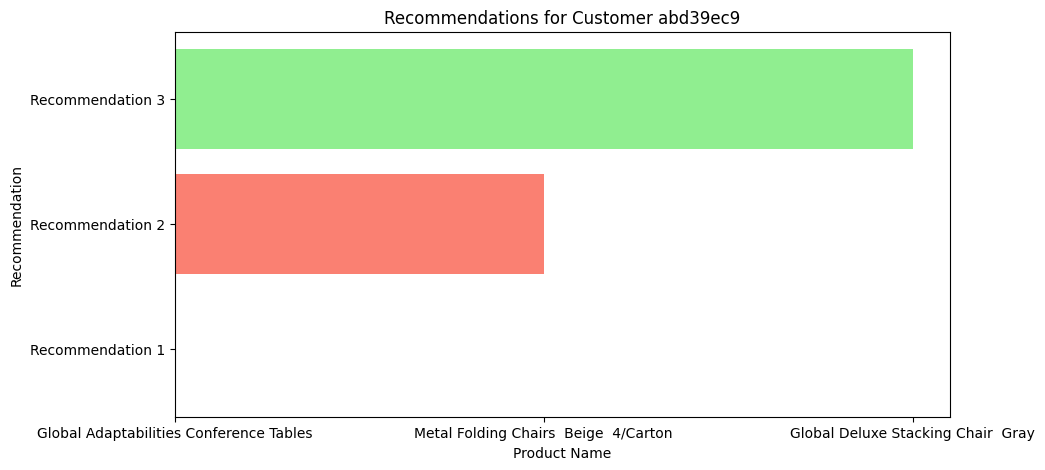

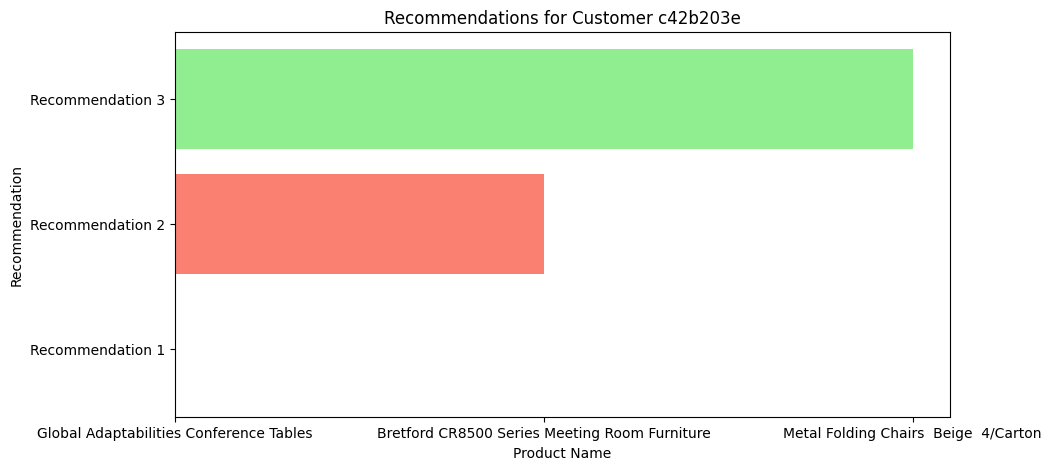

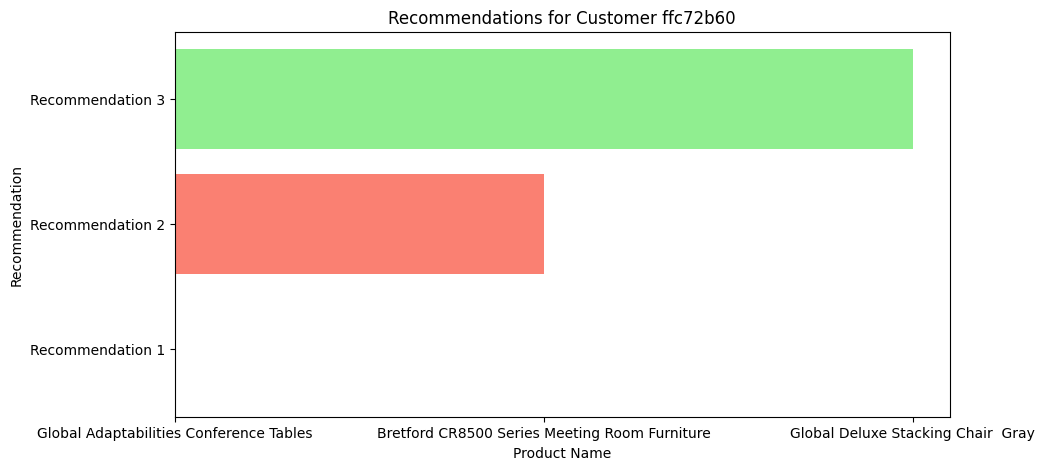

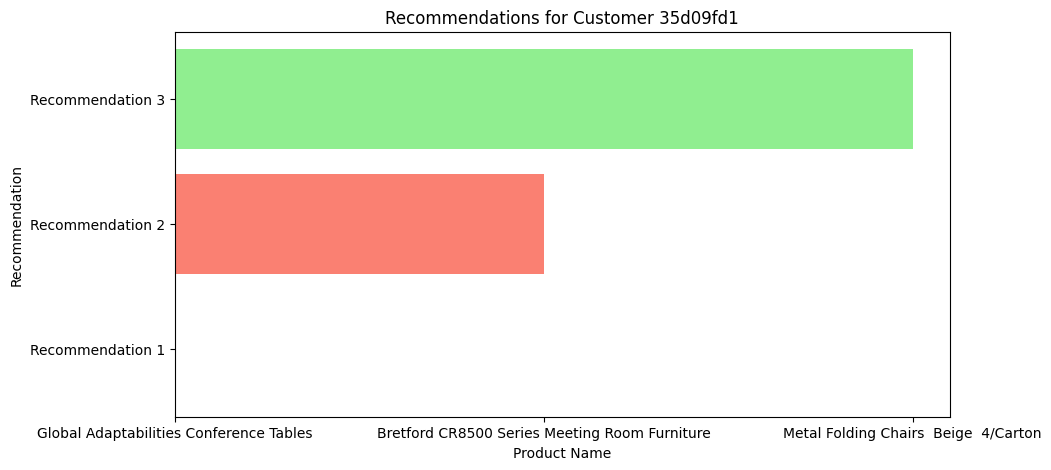

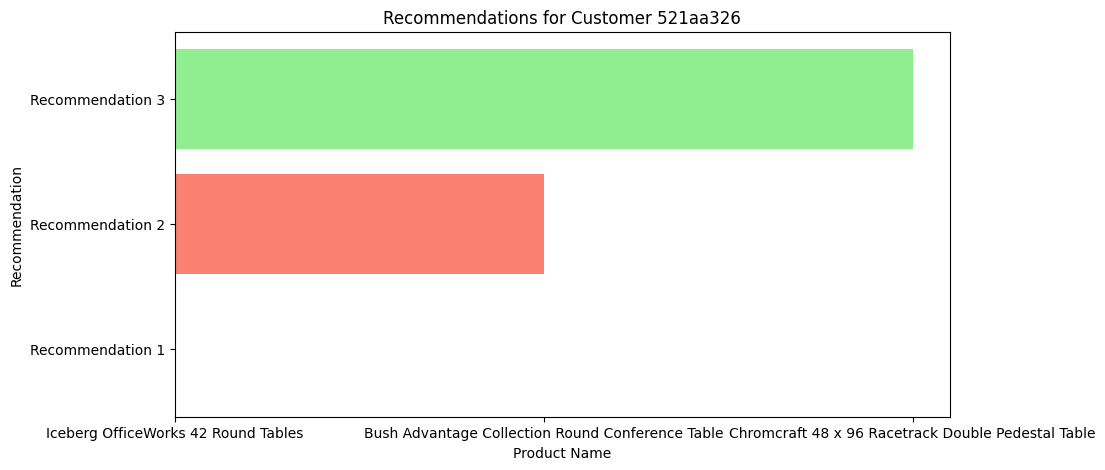

In [139]:
import matplotlib.pyplot as plt

# Select a sample of 5 records
sample_recommendations = customer_data_with_recommendations.sample(n=5)

# Plot the recommendations for each customer
for index, row in sample_recommendations.iterrows():
    customer_id = row['customer_id']
    rec1_name = row['Rec1_product_name']
    rec2_name = row['Rec2_product_name']
    rec3_name = row['Rec3_product_name']
    
    plt.figure(figsize=(10, 5))
    plt.barh(['Recommendation 1', 'Recommendation 2', 'Recommendation 3'], [rec1_name, rec2_name, rec3_name], color=['skyblue', 'salmon', 'lightgreen'])
    plt.xlabel('Product Name')
    plt.ylabel('Recommendation')
    plt.title(f'Recommendations for Customer {customer_id}')
    plt.show()
